### Multimodel-Regression plots

In [1]:
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from matplotlib.axes import Axes
import seaborn as sn
import pandas as pd


plt.rcParams.update({'font.size': 11})
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=16)

In [8]:
lengths = [10,25,50,100,250,500]#,999]

plotdatas = []
for T in lengths:
    plotdata = np.loadtxt("plotdata/"+f"regression_length{T}")
    plotdatas.append(plotdata)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


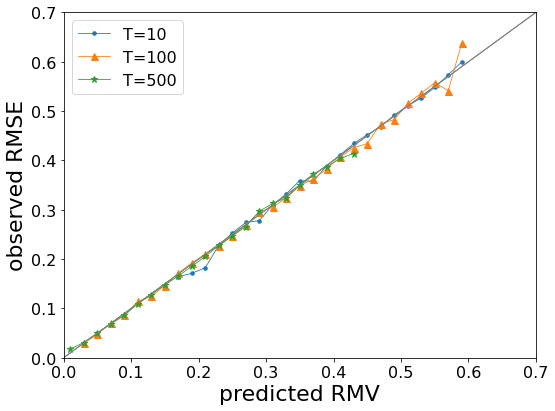

In [9]:
#conf-acc-v1

plt.rcParams.update({'font.size': 16})
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=22)


newfigure = plt.figure(figsize=(8,6))
plotaxes = newfigure.add_subplot(111)
j = 0
for i in [0,3,5]:
    target_values = plotdatas[i][0]
    pred_values = plotdatas[i][1]
    pred_std = plotdatas[i][2]

    #observed error over predicted error
    predicted_errors = np.arange(0.,1,0.02)
    observed_errors = np.zeros(len(predicted_errors))
    n_interval = np.zeros(len(predicted_errors))
    mean_conf = 0
    mean_mse = 0
    mae = 0
    n_total = 0

    for l in range(len(target_values)):
        include = True
        """if len(filtered_models) != 0:
            model = self.models[int(data[3,l])]
            if not model in filtered_models:
                include = False
        if len(filtered_snr) != 0:
            noise = "snr "+str(int(1/data[4,l]+0.5))
            if not noise in filtered_snr:
                include = False"""
        if include == True:
            index = np.where(predicted_errors <= pred_std[l].item())[-1][-1]
            #print(index,pred_std[l]**2)
            n_interval[index] += 1
            observed_errors[index] += np.square(target_values[l] - pred_values[l])
            mean_conf += pred_std[l]**2
            mean_mse += np.square(target_values[l] - pred_values[l])
            mae += np.abs(target_values[l] - pred_values[l])
            n_total += 1

    for l in range(len(predicted_errors)):
        if n_interval[l] > 50:
            observed_errors[l] = np.sqrt(observed_errors[l]/n_interval[l])
        else:
            observed_errors[l] = np.nan

    mean_conf /= n_total
    mean_mse /= n_total
    mae /= n_total
    
    symbols = [".-","^-","*-"]
    
    plotaxes.plot(predicted_errors+0.01,observed_errors,symbols[j],linewidth=0.8,ms=7, label = f"T={lengths[i]}")
    plotaxes.plot(predicted_errors,predicted_errors,"grey",lw=0.8)
    j += 1
    
    
plotaxes.set_xlabel("predicted RMV")#,fontsize=26)
plotaxes.set_ylabel("observed RMSE")#,fontsize=26)
#plotaxes.set_title(f"mean predicted squared error = {mean_conf:.4f}, observed mse = {mean_mse:.4f},\n observed mae={mae:.2f}")#,fontsize=24)
plotaxes.set_xlim(xmin=0,xmax=0.7)
plotaxes.set_ylim(ymin=0,ymax=0.7)
plt.legend()
plt.tight_layout()
plt.savefig("figs/paper/regression_oberserved_vs_predicted_std_v1.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


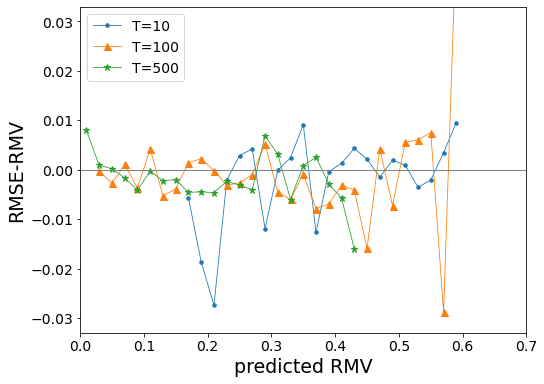

In [6]:
#conf-acc-v2
newfigure = plt.figure(figsize=(8,6))
plotaxes = newfigure.add_subplot(111)
j = 0
for i in [0,3,5]:
    target_values = plotdatas[i][0]
    pred_values = plotdatas[i][1]
    pred_std = plotdatas[i][2]

    #observed error over predicted error
    predicted_errors = np.arange(0.,1,0.02)
    observed_errors = np.zeros(len(predicted_errors))
    n_interval = np.zeros(len(predicted_errors))
    mean_conf = 0
    mean_mse = 0
    mae = 0
    n_total = 0

    for l in range(len(target_values)):
        include = True
        """if len(filtered_models) != 0:
            model = self.models[int(data[3,l])]
            if not model in filtered_models:
                include = False
        if len(filtered_snr) != 0:
            noise = "snr "+str(int(1/data[4,l]+0.5))
            if not noise in filtered_snr:
                include = False"""
        if include == True:
            index = np.where(predicted_errors <= pred_std[l].item())[-1][-1]
            #print(index,pred_std[l]**2)
            n_interval[index] += 1
            observed_errors[index] += np.square(target_values[l] - pred_values[l])
            mean_conf += pred_std[l]**2
            mean_mse += np.square(target_values[l] - pred_values[l])
            mae += np.abs(target_values[l] - pred_values[l])
            n_total += 1

    for l in range(len(predicted_errors)):
        if n_interval[l] > 50:
            observed_errors[l] = np.sqrt(observed_errors[l]/n_interval[l])
        else:
            observed_errors[l] = np.nan

    mean_conf /= n_total
    mean_mse /= n_total
    mae /= n_total
    
    symbols = [".-","^-","*-"]
    
    plotaxes.plot(predicted_errors+0.01,observed_errors-predicted_errors-0.01,symbols[j],linewidth=0.8,ms=7, label = f"T={lengths[i]}")
    plotaxes.plot(predicted_errors,predicted_errors-predicted_errors,"grey",lw=0.8)
    j += 1
    
    
plotaxes.set_xlabel("predicted RMV")#,fontsize=26)
plotaxes.set_ylabel("RMSE-RMV")#,fontsize=26)
#plotaxes.set_title(f"mean predicted squared error = {mean_conf:.4f}, observed mse = {mean_mse:.4f},\n observed mae={mae:.2f}")#,fontsize=24)
plotaxes.set_xlim(xmin=0,xmax=0.7)
plotaxes.set_ylim(ymin=-0.033,ymax=0.033)
plt.legend()

plt.savefig("figs/paper/regression_oberserved_vs_predicted_std_v2.eps")
plt.show()

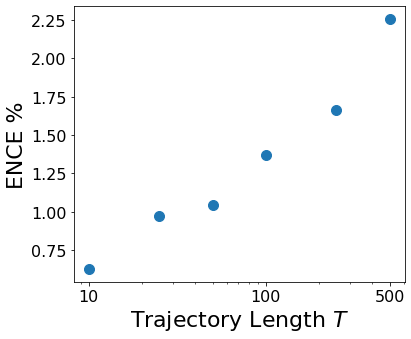

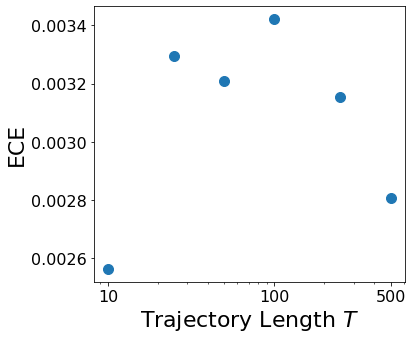

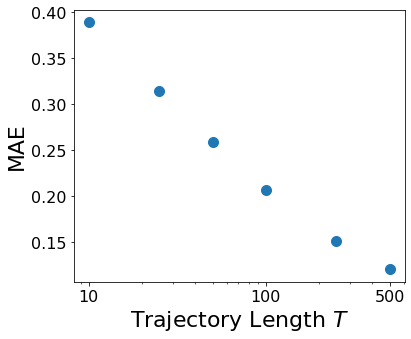

In [10]:
#expected normalized calibration error (ENCE)
newfigure = plt.figure(figsize=(6,5))
plotaxes = newfigure.add_subplot(111)

ENCEs = np.zeros(len(lengths))
ECEs = np.zeros(len(lengths))
maes = np.zeros(len(lengths))
j = 0
for i in range(len(lengths)):
    target_values = plotdatas[i][0]
    pred_values = plotdatas[i][1]
    pred_std = plotdatas[i][2]

    #observed error over predicted error
    binwidth = 0.02
    predicted_errors = np.arange(0.,1,binwidth)
    mean_predicted_error = np.zeros(len(predicted_errors))
    observed_errors = np.zeros(len(predicted_errors))
    n_interval = np.zeros(len(predicted_errors))
    mean_conf = 0
    mean_mse = 0
    mae = 0
    n_total = 0

    for l in range(len(target_values)):
        include = True
        """if len(filtered_models) != 0:
            model = self.models[int(data[3,l])]
            if not model in filtered_models:
                include = False
        if len(filtered_snr) != 0:
            noise = "snr "+str(int(1/data[4,l]+0.5))
            if not noise in filtered_snr:
                include = False"""
        if include == True:
            index = np.where(predicted_errors <= pred_std[l].item())[-1][-1]
            #print(index,pred_std[l]**2)
            n_interval[index] += 1
            observed_errors[index] += np.square(target_values[l] - pred_values[l])
            mean_predicted_error[index] += pred_std[l]**2
            mean_conf += pred_std[l]**2
            mean_mse += np.square(target_values[l] - pred_values[l])
            mae += np.abs(target_values[l] - pred_values[l])
            n_total += 1

    for l in range(len(predicted_errors)):
        if n_interval[l] > 50:
            observed_errors[l] = np.sqrt(observed_errors[l]/n_interval[l])
            mean_predicted_error[l] = np.sqrt(mean_predicted_error[l]/n_interval[l])
        else:
            observed_errors[l] = np.nan

    mean_conf /= n_total
    mean_mse /= n_total
    mae /= n_total
    maes[i] = mae
    
    cali_errors = np.abs(observed_errors-mean_predicted_error)
    #print(observed_mse)
    #print(mean_predicted_error)
    ENCE = 0
    ECE = 0
    NN = 0
    for k in range(len(cali_errors)):
        if not np.isnan(cali_errors[k]):
            ENCE += n_interval[k]*(cali_errors[k]/(mean_predicted_error[k]))
            ECE += n_interval[k]*cali_errors[k]
            NN += n_interval[k]*1
    ENCE = ENCE/NN
    ECE = ECE/NN
    ENCEs[i] = ENCE
    ECEs[i] = ECE
    j += 1
    
plotaxes.plot(lengths,ENCEs*100,"o",ms=10)
#print(ECEs) 
    
    
plotaxes.set_xlabel(r"Trajectory Length $T$")#,fontsize=26)
plotaxes.set_ylabel(r"ENCE %")#,fontsize=26)
plotaxes.set_xscale('log')
#plotaxes.set_xticks([0,1,2])
#plotaxes.set_xticklabels(lengths)
#plotaxes.set_title(f"mean predicted squared error = {mean_conf:.4f}, observed mse = {mean_mse:.4f},\n observed mae={mae:.2f}")#,fontsize=24)
#plotaxes.set_xlim(xmin=0,xmax=0.7)
#plotaxes.set_ylim(ymin=-0.033,ymax=0.033)
#plt.legend()
plotaxes.set_xticks([10,100,500])
plotaxes.set_xticklabels([10,100,500])
plt.tight_layout()

plt.savefig("figs/paper/regression_ence.eps")
plt.show()

#ECE figure ( not normalized)
newfigure = plt.figure(figsize=(6,5))
plotaxes = newfigure.add_subplot(111)
plotaxes.plot(lengths,ECEs,"o",ms=10)
#print(ECEs) 
    
    
plotaxes.set_xlabel(r"Trajectory Length $T$")#,fontsize=26)
plotaxes.set_ylabel(r"ECE")#,fontsize=26)
plotaxes.set_xscale('log')
#plotaxes.set_xticks([0,1,2])
#plotaxes.set_xticklabels(lengths)
#plotaxes.set_title(f"mean predicted squared error = {mean_conf:.4f}, observed mse = {mean_mse:.4f},\n observed mae={mae:.2f}")#,fontsize=24)
#plotaxes.set_xlim(xmin=0,xmax=0.7)
#plotaxes.set_ylim(ymin=-0.033,ymax=0.033)
#plt.legend()
plotaxes.set_xticks([10,100,500])
plotaxes.set_xticklabels([10,100,500])
plt.tight_layout()
plt.savefig("figs/paper/regression_ece.eps", bbox_inches="tight")
plt.show()

#maes plot
newfigure = plt.figure(figsize=(6,5))
plotaxes = newfigure.add_subplot(111)

plotaxes.plot(lengths,maes,"o",ms=10)
plotaxes.set_xlabel(r"Trajectory Length $T$")#,fontsize=26)
plotaxes.set_ylabel("MAE")#,fontsize=26)
plotaxes.set_xscale('log')
plotaxes.set_xticks([10,100,500])
plotaxes.set_xticklabels([10,100,500])
plt.tight_layout()
plt.savefig("figs/paper/regression_maes.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


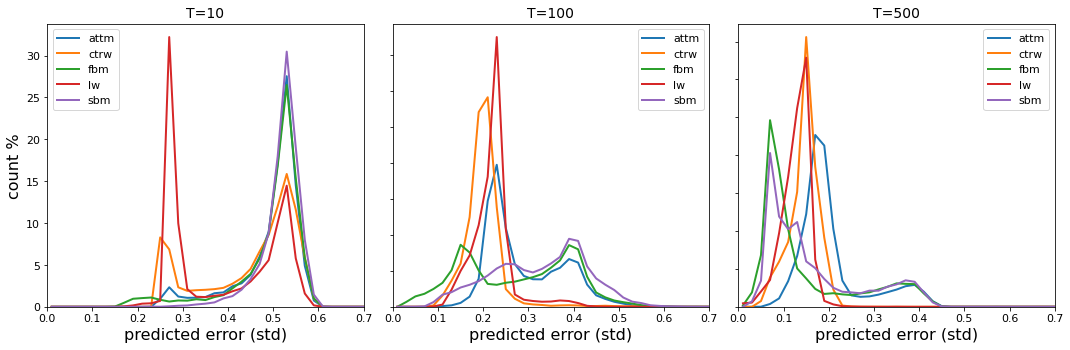

In [6]:
#error histogram

#newfigure = plt.figure(figsize=(8,6))
fig, axs = plt.subplots(1,3, figsize=(15,5))

it = 0
for i in [0,3,5]:
    plotaxes = axs[it]#newfigure.add_subplot(111)
    it += 1
    
    pred_values = plotdatas[i][1]
    target_values = plotdatas[i][0]
    pred_std = plotdatas[i][2]
    all_models = plotdatas[i][3]
    all_noises = plotdatas[i][4]

    #observed error over predicted error
    predicted_errors = np.arange(0.,1,0.02)
    observed_errors = np.zeros(len(predicted_errors))
    n_interval = np.zeros(len(predicted_errors))
    n_interval_per_model = np.zeros((5,len(predicted_errors)))
    n_model = np.zeros(5)

    for l in range(len(target_values)):
        """if len(filtered_models) != 0:
            model = self.models[int(data[3,l])]
            if not model in filtered_models:
                continue
        if len(filtered_snr) != 0:
            noise = "snr "+str(int(1/data[4,l]+0.5))
            if not noise in filtered_snr:
                continue"""


        index = np.where(predicted_errors <= pred_std[l].item())[-1][-1]
        #print(index,pred_std[l]**2)
        n_interval[index] += 1
        observed_errors[index] += np.square(target_values[l] - pred_values[l])
        n_interval_per_model[int(all_models[l]),index] += 1
        n_model[int(all_models[l])] += 1

    for l in range(len(predicted_errors)):
        if n_interval[l] > 50:
            observed_errors[l] = np.sqrt(observed_errors[l]/n_interval[l])
        else:
            observed_errors[l] = np.nan


    models = ["attm","ctrw","fbm","lw","sbm"]
    for model in range(5):
        plotaxes.plot(predicted_errors+0.01,n_interval_per_model[model]/n_model[model]*100,label=models[model],lw=2)
    plotaxes.legend()
    plotaxes.set_xlabel("predicted error (std)")#,fontsize=26)
    plotaxes.set_ylabel("count %")#,fontsize=26)
    plotaxes.set_ylim(ymin = 0)
    plotaxes.set_xlim(xmin = 0, xmax=0.7)
        
    plotaxes.label_outer()
    plotaxes.set_title(f"T={lengths[i]}")
    #plt.savefig(f"figs/paper/regression_errorhisto_allmodels_T{lengths[i]}.eps")
plt.tight_layout()
plt.savefig(f"figs/paper/regression_errorhisto_allmodels_allT.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


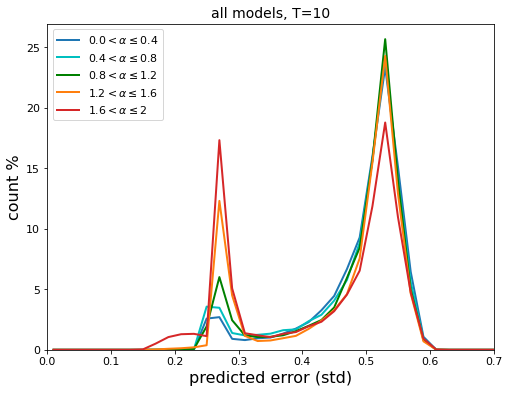

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


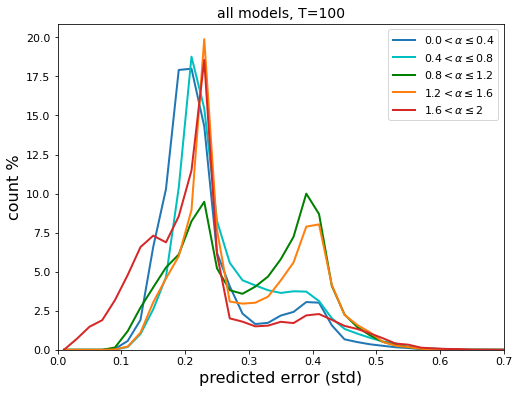

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


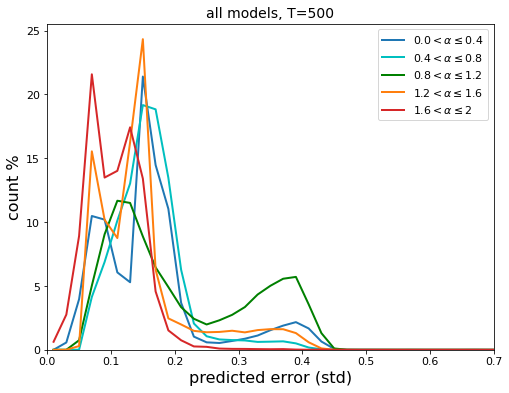

In [7]:
#histogramm exp split!
for i in [0,3,5]:
    newfigure = plt.figure(figsize=(8,6))
    plotaxes = newfigure.add_subplot(111)
    
    exponent_split = np.asarray([0,0.4,0.8,1.2,1.6])
    pred_values = plotdatas[i][1]
    target_values = plotdatas[i][0]
    pred_std = plotdatas[i][2]
    all_models = plotdatas[i][3]
    all_noises = plotdatas[i][4]

    #label for the exponent split
    exp_labels = []
    for k in range(len(exponent_split)-1):
        labeltxt = f"{exponent_split[k]}"+r"$<\alpha\leq$"+f"{exponent_split[k+1]}"
        exp_labels.append(labeltxt)
    labeltxt = f"{exponent_split[-1]}"+r"$<\alpha\leq$2"
    exp_labels.append(labeltxt)

    #observed error over predicted error
    predicted_errors = np.arange(0.,1,0.02)
    observed_errors = np.zeros((len(predicted_errors),len(exponent_split)))
    n_interval = np.zeros((len(predicted_errors),len(exponent_split)))
    n_interval_per_model = np.zeros((5,len(exponent_split),len(predicted_errors)))
    n_exp = np.zeros(len(exponent_split))
    
    for l in range(len(target_values)):
        """if len(filtered_models) != 0:
            model = self.models[int(data[3,l])]
            if not model in filtered_models:
                continue
        if len(filtered_snr) != 0:
            noise = "snr "+str(int(1/data[4,l]+0.5))
            if not noise in filtered_snr:
                continue"""


        index = np.where(predicted_errors <= pred_std[l].item())[-1][-1]
        index_exp = np.where(exponent_split < target_values[l].item())[-1][-1]
        #print(index,pred_std[l]**2)
        n_interval[index,index_exp] += 1
        observed_errors[index,index_exp] += np.square(target_values[l] - pred_values[l])
        n_interval_per_model[int(all_models[l]),index_exp,index] += 1
        n_exp[index_exp] += 1

    for l in range(len(predicted_errors)):
        for k in range(len(exponent_split)):
            if n_interval[l,k] > 10:
                observed_errors[l,k] = np.sqrt(observed_errors[l,k]/n_interval[l,k])
            else:
                observed_errors[l,k] = np.nan


    models = ["attm","ctrw","fbm","lw","sbm"]
    expsplit_colors = ['#1f77b4',"c","g","#ff7f0e","#d62728"]
    for k in range(len(exponent_split)):
        plotaxes.plot(predicted_errors+0.01,n_interval[:,k]/n_exp[k]*100,label=exp_labels[k],
                      lw=2,color=expsplit_colors[k])
    plotaxes.set_xlabel("predicted error (std)")
    plotaxes.set_ylabel("count %")
    plotaxes.legend()
    plotaxes.set_ylim(ymin = 0)
    plotaxes.set_xlim(xmin = 0, xmax=0.7)
    plotaxes.set_title(f"all models, T={lengths[i]}")
    plt.savefig(f"figs/paper/regression_errorhisto_allmodels_T{lengths[i]}_expsplit.eps")
    
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


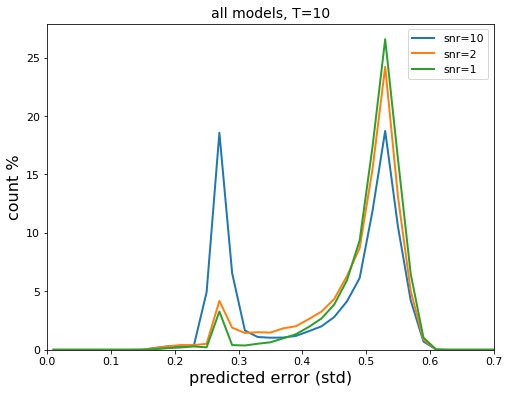

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


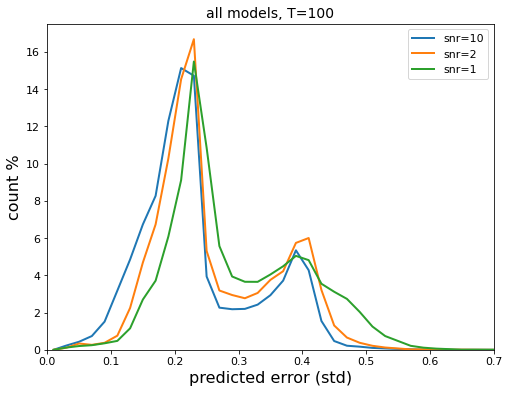

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


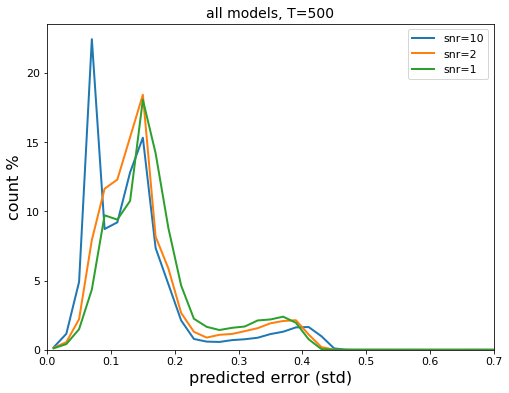

In [8]:
#errorhisto noisesplit
for i in [0,3,5]:
    newfigure = plt.figure(figsize=(8,6))
    plotaxes = newfigure.add_subplot(111)
    
    pred_values = plotdatas[i][1]
    target_values = plotdatas[i][0]
    pred_std = plotdatas[i][2]
    all_models = plotdatas[i][3]
    all_noises = plotdatas[i][4]
    snrs = ["10","2","1"]


    #observed error over predicted error
    predicted_errors = np.arange(0.,1,0.02)
    observed_errors = np.zeros((len(predicted_errors),len(snrs)))
    n_interval = np.zeros((len(predicted_errors),len(snrs)))
    n_interval_per_model = np.zeros((5,len(snrs),len(predicted_errors)))
    n_snr = np.zeros(3)
    
    for l in range(len(target_values)):
        """if len(filtered_models) != 0:
            model = self.models[int(data[3,l])]
            if not model in filtered_models:
                continue
        if len(filtered_snr) != 0:
            noise = "snr "+str(int(1/data[4,l]+0.5))
            if not noise in filtered_snr:
                continue"""


        index = np.where(predicted_errors <= pred_std[l].item())[-1][-1]
        snr = int(1/all_noises[l]+0.5)
        index_snr = 2
        if snr == 2:
            index_snr = 1
        elif snr > 2:
            index_snr = 0
        #print(index,pred_std[l]**2)
        n_interval[index,index_snr] += 1
        observed_errors[index,index_snr] += np.square(target_values[l] - pred_values[l])
        n_interval_per_model[int(all_models[l]),index_snr,index] += 1
        n_snr[index_snr] += 1
        
    for l in range(len(predicted_errors)):
        for k in range(len(snrs)):
            if n_interval[l,k] > 10:
                observed_errors[l,k] = np.sqrt(observed_errors[l,k]/n_interval[l,k])
            else:
                observed_errors[l,k] = np.nan



    models = ["attm","ctrw","fbm","lw","sbm"]
    for k in range(len(snrs)):
        plotaxes.plot(predicted_errors+0.01,n_interval[:,k]/n_snr[k]*100,label=f"snr={snrs[k]}",lw=2)
    plotaxes.set_xlabel("predicted error (std)")
    plotaxes.set_ylabel("count %")
    plotaxes.legend()
    plotaxes.set_ylim(ymin = 0)
    plotaxes.set_xlim(xmin = 0, xmax=0.7)
    plotaxes.set_title(f"all models, T={lengths[i]}")
    
    plt.savefig(f"figs/paper/regression_errorhisto_allmodels_T{lengths[i]}_noisesplit.eps")
    
    plt.show()
        

### Singlemodel-Regression plots

In [5]:
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from matplotlib.axes import Axes
import seaborn as sn
import pandas as pd


plt.rcParams.update({'font.size': 11})
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=16)

In [5]:
lengths = [10,100,500]
models = ["attm","ctrw","fbm","lw","sbm"]

plotdatas_models = []
for i in range(len(models)):
    plotdatas = []
    for T in lengths:
        plotdata = np.loadtxt("plotdata/"+models[i]+f"regression_length{T}")
        plotdatas.append(plotdata)
    plotdatas_models.append(plotdatas)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


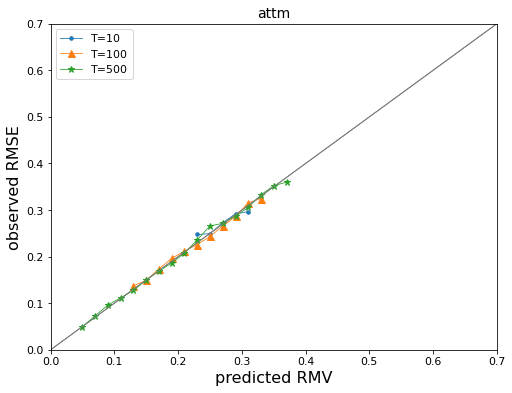

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


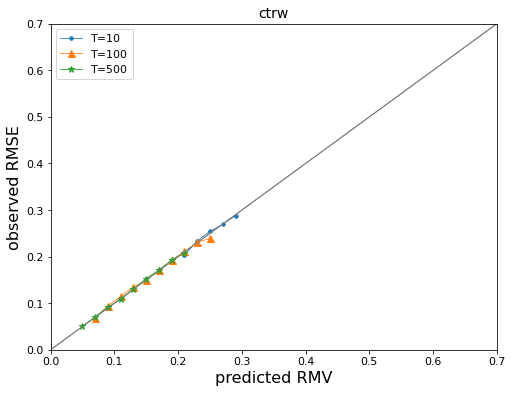

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


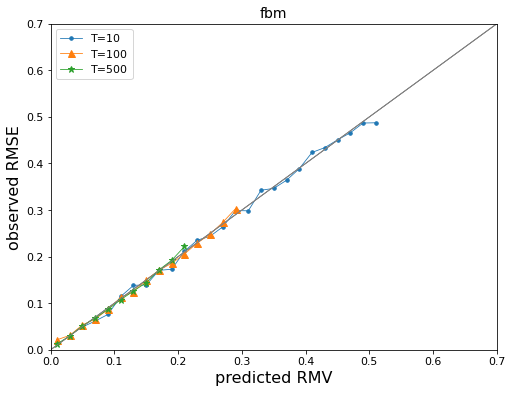

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


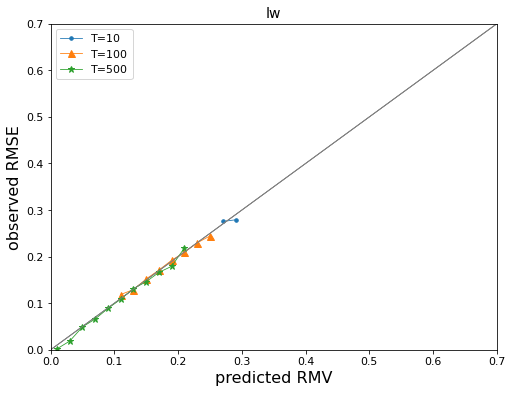

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


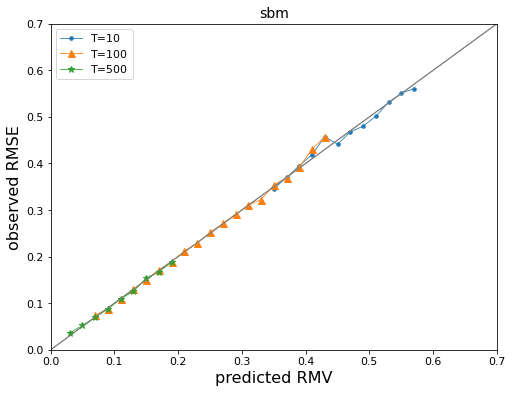

In [7]:
#conf-acc-v1
for modl in range(len(models)):
    j=0

    newfigure = plt.figure(figsize=(8,6))
    plotaxes = newfigure.add_subplot(111)
    for i in range(len(lengths)):
        target_values = plotdatas_models[modl][i][0]
        pred_values = plotdatas_models[modl][i][1]
        pred_std = plotdatas_models[modl][i][2]

        #observed error over predicted error
        predicted_errors = np.arange(0.,1,0.02)
        observed_errors = np.zeros(len(predicted_errors))
        n_interval = np.zeros(len(predicted_errors))
        mean_conf = 0
        mean_mse = 0
        mae = 0
        n_total = 0

        for l in range(len(target_values)):
            include = True
            """if len(filtered_models) != 0:
                model = self.models[int(data[3,l])]
                if not model in filtered_models:
                    include = False
            if len(filtered_snr) != 0:
                noise = "snr "+str(int(1/data[4,l]+0.5))
                if not noise in filtered_snr:
                    include = False"""
            if include == True:
                index = np.where(predicted_errors <= pred_std[l].item())[-1][-1]
                #print(index,pred_std[l]**2)
                n_interval[index] += 1
                observed_errors[index] += np.square(target_values[l] - pred_values[l])
                mean_conf += pred_std[l]**2
                mean_mse += np.square(target_values[l] - pred_values[l])
                mae += np.abs(target_values[l] - pred_values[l])
                n_total += 1

        for l in range(len(predicted_errors)):
            if n_interval[l] > 50:
                observed_errors[l] = np.sqrt(observed_errors[l]/n_interval[l])
            else:
                observed_errors[l] = np.nan

        mean_conf /= n_total
        mean_mse /= n_total
        mae /= n_total

        symbols = [".-","^-","*-"]

        plotaxes.plot(predicted_errors+0.01,observed_errors,symbols[j],linewidth=0.8,ms=7, label = f"T={lengths[i]}")
        plotaxes.plot(predicted_errors,predicted_errors,"grey",lw=0.8)
        j += 1


    plotaxes.set_xlabel("predicted RMV")#,fontsize=26)
    plotaxes.set_ylabel("observed RMSE")#,fontsize=26)
    #plotaxes.set_title(f"mean predicted squared error = {mean_conf:.4f}, observed mse = {mean_mse:.4f},\n observed mae={mae:.2f}")#,fontsize=24)
    plotaxes.set_xlim(xmin=0,xmax=0.7)
    plotaxes.set_ylim(ymin=0,ymax=0.7)
    plt.legend()
    plotaxes.set_title(models[modl])

    plt.savefig("figs/paper/regression_singlemodel_"+models[modl]+"_oberserved_vs_predicted_std_v1.eps")
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


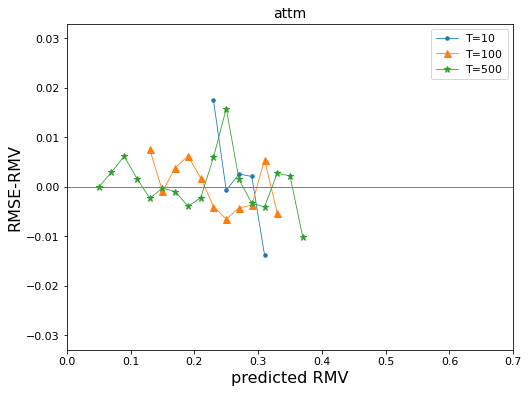

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


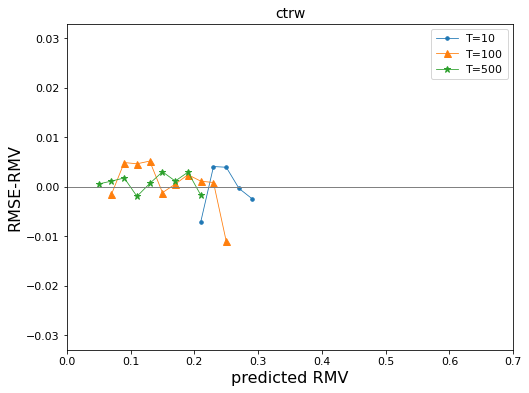

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


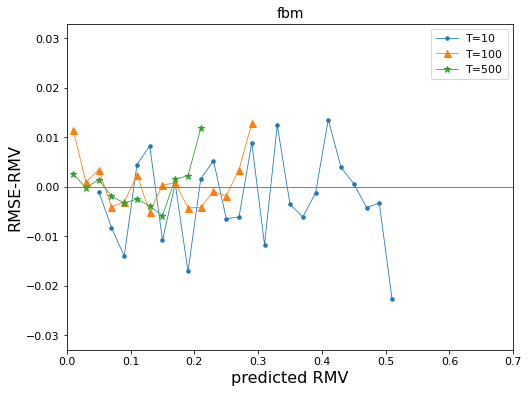

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


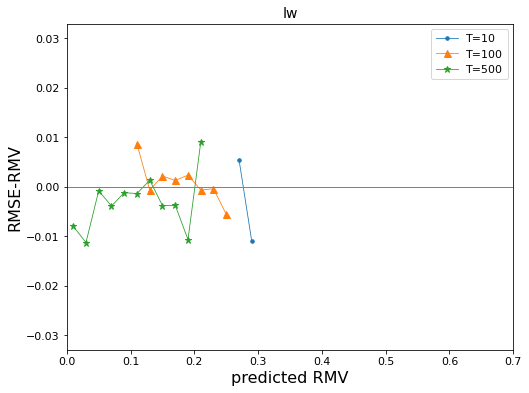

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


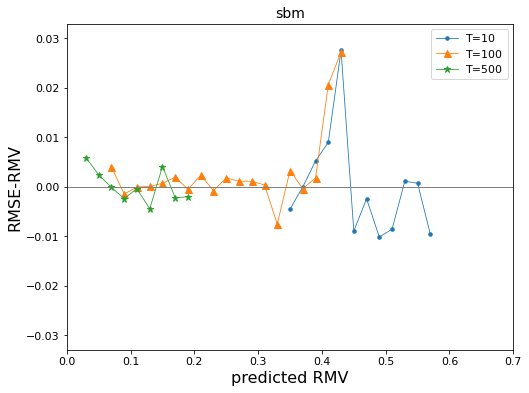

In [8]:
#conf-acc-v2
for modl in range(len(models)):
    j=0

    newfigure = plt.figure(figsize=(8,6))
    plotaxes = newfigure.add_subplot(111)
    for i in range(len(lengths)):
        target_values = plotdatas_models[modl][i][0]
        pred_values = plotdatas_models[modl][i][1]
        pred_std = plotdatas_models[modl][i][2]

        #observed error over predicted error
        predicted_errors = np.arange(0.,1,0.02)
        observed_errors = np.zeros(len(predicted_errors))
        n_interval = np.zeros(len(predicted_errors))
        mean_conf = 0
        mean_mse = 0
        mae = 0
        n_total = 0

        for l in range(len(target_values)):
            include = True
            """if len(filtered_models) != 0:
                model = self.models[int(data[3,l])]
                if not model in filtered_models:
                    include = False
            if len(filtered_snr) != 0:
                noise = "snr "+str(int(1/data[4,l]+0.5))
                if not noise in filtered_snr:
                    include = False"""
            if include == True:
                index = np.where(predicted_errors <= pred_std[l].item())[-1][-1]
                #print(index,pred_std[l]**2)
                n_interval[index] += 1
                observed_errors[index] += np.square(target_values[l] - pred_values[l])
                mean_conf += pred_std[l]**2
                mean_mse += np.square(target_values[l] - pred_values[l])
                mae += np.abs(target_values[l] - pred_values[l])
                n_total += 1

        for l in range(len(predicted_errors)):
            if n_interval[l] > 50:
                observed_errors[l] = np.sqrt(observed_errors[l]/n_interval[l])
            else:
                observed_errors[l] = np.nan

        mean_conf /= n_total
        mean_mse /= n_total
        mae /= n_total


        symbols = [".-","^-","*-"]

        plotaxes.plot(predicted_errors+0.01,observed_errors-predicted_errors-0.01,symbols[j],linewidth=0.8,ms=7, label = f"T={lengths[i]}")
        plotaxes.plot(predicted_errors,predicted_errors-predicted_errors,"grey",lw=0.8)
        j += 1


    plotaxes.set_xlabel("predicted RMV")#,fontsize=26)
    plotaxes.set_ylabel("RMSE-RMV")#,fontsize=26)
    #plotaxes.set_title(f"mean predicted squared error = {mean_conf:.4f}, observed mse = {mean_mse:.4f},\n observed mae={mae:.2f}")#,fontsize=24)
    plotaxes.set_xlim(xmin=0,xmax=0.7)
    plotaxes.set_ylim(ymin=-0.033,ymax=0.033)
    plt.legend()
    plotaxes.set_title(models[modl])

    plt.savefig("figs/paper/regression_singlemodel_"+models[modl]+"_oberserved_vs_predicted_std_v2.eps")
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


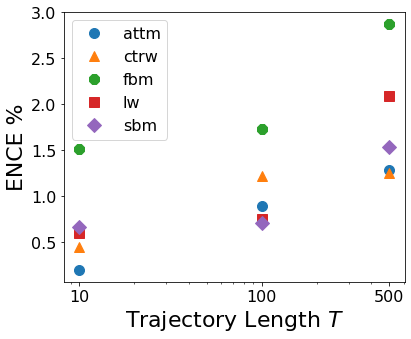

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


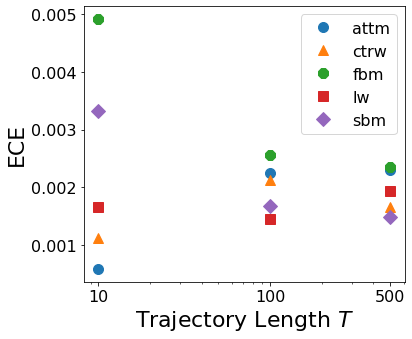

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


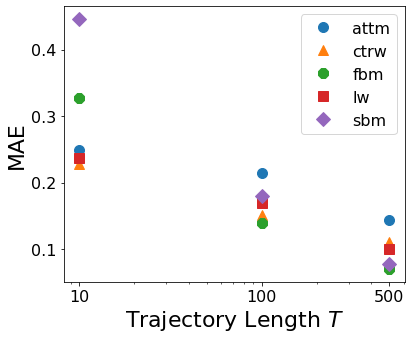

In [6]:
#expected normalized calibration error (ENCE) and mae
newfigure = plt.figure(figsize=(6,5))
plotaxes = newfigure.add_subplot(111)


maes = np.zeros((len(models),len(lengths)))
ENCEs = np.zeros((len(models),len(lengths)))
ECEs = np.zeros((len(models),len(lengths)))
for modl in range(len(models)):
    j = 0
    for i in range(len(lengths)):
        target_values = plotdatas_models[modl][i][0]
        pred_values = plotdatas_models[modl][i][1]
        pred_std = plotdatas_models[modl][i][2]

        #observed error over predicted error
        binwidth = 0.02
        predicted_errors = np.arange(0.,1,binwidth)
        mean_predicted_error = np.zeros(len(predicted_errors))
        observed_errors = np.zeros(len(predicted_errors))
        n_interval = np.zeros(len(predicted_errors))
        mean_conf = 0
        mean_mse = 0
        mae = 0
        n_total = 0

        for l in range(len(target_values)):
            include = True
            """if len(filtered_models) != 0:
                model = self.models[int(data[3,l])]
                if not model in filtered_models:
                    include = False
            if len(filtered_snr) != 0:
                noise = "snr "+str(int(1/data[4,l]+0.5))
                if not noise in filtered_snr:
                    include = False"""
            if include == True:
                index = np.where(predicted_errors <= pred_std[l].item())[-1][-1]
                #print(index,pred_std[l]**2)
                n_interval[index] += 1
                observed_errors[index] += np.square(target_values[l] - pred_values[l])
                mean_predicted_error[index] += pred_std[l]**2
                mean_conf += pred_std[l]**2
                mean_mse += np.square(target_values[l] - pred_values[l])
                mae += np.abs(target_values[l] - pred_values[l])
                n_total += 1

        for l in range(len(predicted_errors)):
            if n_interval[l] > 50:
                observed_errors[l] = np.sqrt(observed_errors[l]/n_interval[l])
                mean_predicted_error[l] = np.sqrt(mean_predicted_error[l]/n_interval[l])
            else:
                observed_errors[l] = np.nan

        mean_conf /= n_total
        mean_mse /= n_total
        mae /= n_total
        maes[modl][i] = mae
        
        cali_errors = np.abs(observed_errors-mean_predicted_error)
        #print(observed_mse)
        #print(mean_predicted_error)
        ENCE = 0
        ECE = 0
        NN = 0
        for k in range(len(cali_errors)):
            if not np.isnan(cali_errors[k]):
                ENCE += n_interval[k]*(cali_errors[k]/(mean_predicted_error[k]))
                ECE += n_interval[k]*cali_errors[k]
                NN += n_interval[k]*1
        ENCE = ENCE/NN
        ECE = ECE/NN
        ENCEs[modl,i] = ENCE
        ECEs[modl,i] = ECE
        #symbols = [".-","^-","*-"]
        j += 1

#plot ENCES   
symbols = ['o','^','8','s','D'] 
for modl in range(5):
    plotaxes.plot(lengths,ENCEs[modl]*100,symbols[modl],ms=10,label=models[modl])
#print(ENCEs)
    
    
plotaxes.set_xlabel(r"Trajectory Length $T$")#,fontsize=26)
plotaxes.set_ylabel(r"ENCE %")#,fontsize=26)
plotaxes.set_xscale('log')
plotaxes.set_xticks(lengths)
plotaxes.set_xticklabels(lengths)
#plotaxes.set_title(f"mean predicted squared error = {mean_conf:.4f}, observed mse = {mean_mse:.4f},\n observed mae={mae:.2f}")#,fontsize=24)
#plotaxes.set_xlim(xmin=0,xmax=0.7)
#plotaxes.set_ylim(ymin=-0.033,ymax=0.033)
plt.legend()
plt.tight_layout()
plt.savefig("figs/paper/regression_singlemodel_ence.eps")
plt.show()

#plot ECE (not normalized)  

newfigure = plt.figure(figsize=(6,5))
plotaxes = newfigure.add_subplot(111)

symbols = ['o','^','8','s','D'] 
for modl in range(5):
    plotaxes.plot(lengths,ECEs[modl],symbols[modl],ms=10,label=models[modl])
#print(ENCEs)
    
    
plotaxes.set_xlabel(r"Trajectory Length $T$")#,fontsize=26)
plotaxes.set_ylabel(r"ECE")#,fontsize=26)
plotaxes.set_xscale('log')
plotaxes.set_xticks(lengths)
plotaxes.set_xticklabels(lengths)
#plotaxes.set_title(f"mean predicted squared error = {mean_conf:.4f}, observed mse = {mean_mse:.4f},\n observed mae={mae:.2f}")#,fontsize=24)
#plotaxes.set_xlim(xmin=0,xmax=0.7)
#plotaxes.set_ylim(ymin=-0.033,ymax=0.033)
plt.legend()
plt.tight_layout()
plt.savefig("figs/paper/regression_singlemodel_ece.eps", bbox_inches="tight")
plt.show()

newfigure = plt.figure(figsize=(6,5))
plotaxes = newfigure.add_subplot(111)

symbols = ['o','^','8','s','D']
for modl in range(len(models)):
    plotaxes.plot(lengths,maes[modl],symbols[modl],label=models[modl],ms=10)

plotaxes.set_xscale('log')
plotaxes.set_xticks(lengths)
plotaxes.set_xticklabels(lengths)
plotaxes.set_xlabel(r"Trajectory Length $T$")
plotaxes.set_ylabel("MAE")
plt.legend()
plt.tight_layout()
plt.savefig("figs/paper/regression_singlemodel_maes.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


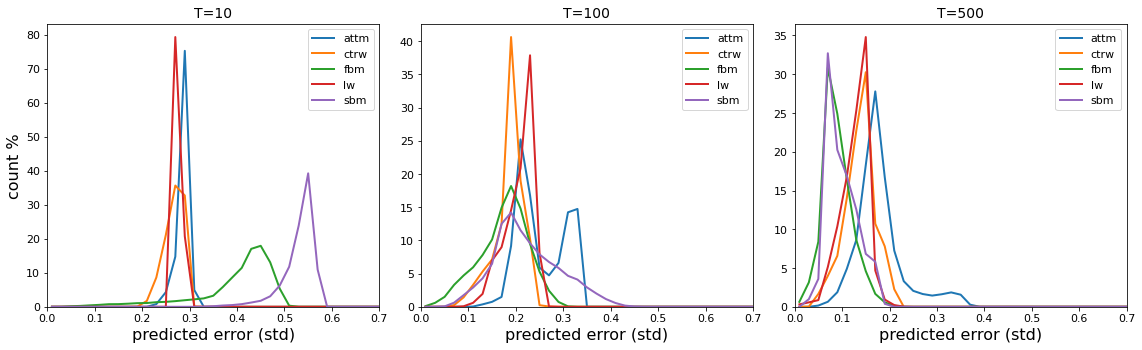

In [14]:
#error histogram

fig, axs = plt.subplots(1,3, figsize=(16,5))

it = 0
for i in range(len(lengths)):
        plotaxes = axs[it]#newfigure.add_subplot(111)
        it += 1
        
        #newfigure = plt.figure(figsize=(8,6))
        #plotaxes = newfigure.add_subplot(111)
        for modl in range(len(models)):
            pred_values = plotdatas_models[modl][i][1]
            target_values = plotdatas_models[modl][i][0]
            pred_std = plotdatas_models[modl][i][2]
            all_models = plotdatas_models[modl][i][3]
            all_noises = plotdatas_models[modl][i][4]

            #observed error over predicted error
            predicted_errors = np.arange(0.,1,0.02)
            observed_errors = np.zeros(len(predicted_errors))
            n_interval = np.zeros(len(predicted_errors))
            n_interval_per_model = np.zeros((5,len(predicted_errors)))
            n_model = np.zeros(5)

            for l in range(len(target_values)):
                """if len(filtered_models) != 0:
                    model = self.models[int(data[3,l])]
                    if not model in filtered_models:
                        continue
                if len(filtered_snr) != 0:
                    noise = "snr "+str(int(1/data[4,l]+0.5))
                    if not noise in filtered_snr:
                        continue"""


                index = np.where(predicted_errors <= pred_std[l].item())[-1][-1]
                #print(index,pred_std[l]**2)
                n_interval[index] += 1
                observed_errors[index] += np.square(target_values[l] - pred_values[l])
                n_interval_per_model[int(all_models[l]),index] += 1
                n_model[int(all_models[l])] += 1

            for l in range(len(predicted_errors)):
                if n_interval[l] > 50:
                    observed_errors[l] = np.sqrt(observed_errors[l]/n_interval[l])
                else:
                    observed_errors[l] = np.nan


            plotaxes.plot(predicted_errors+0.01,n_interval_per_model[modl]/n_model[modl]*100,label=models[modl],lw=2)
        plotaxes.legend()
        plotaxes.set_xlabel("predicted error (std)")#,fontsize=26)
        
        if it == 1:
            plotaxes.set_ylabel("count %")#,fontsize=26)
        plotaxes.set_ylim(ymin = 0)
        plotaxes.set_xlim(xmin = 0, xmax=0.7)


        #plotaxes.label_outer()
        plotaxes.set_title(f"T={lengths[i]}")
plt.tight_layout()
plt.savefig(f"figs/paper/regression_singlemodel_errorhisto_allT.eps")
plt.show()

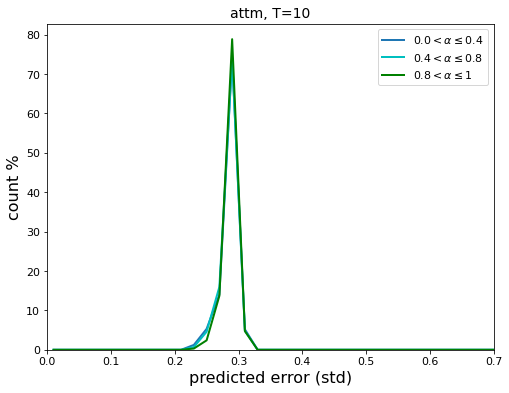

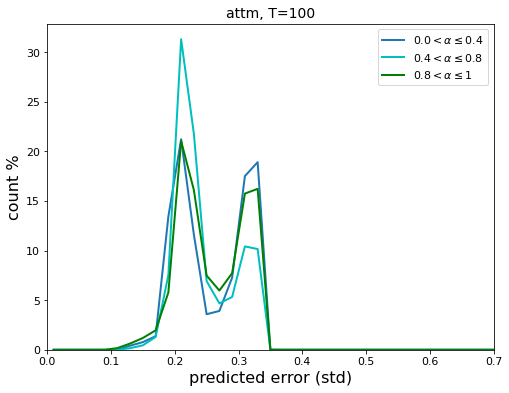

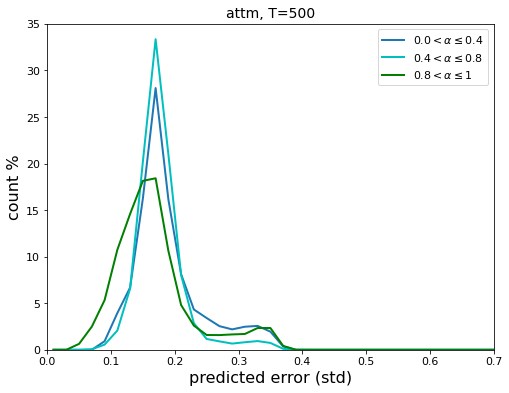

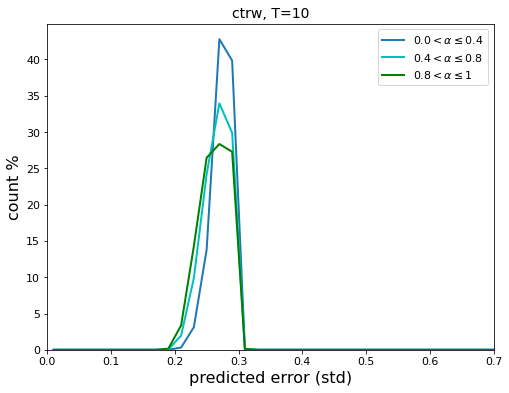

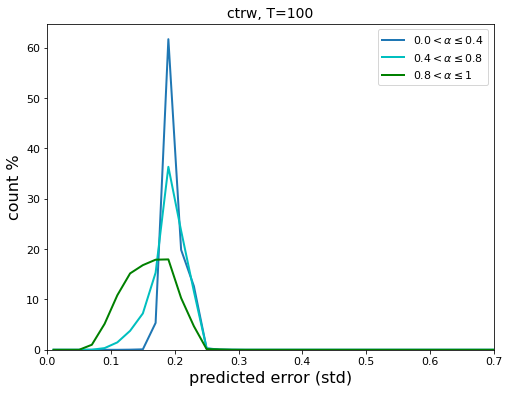

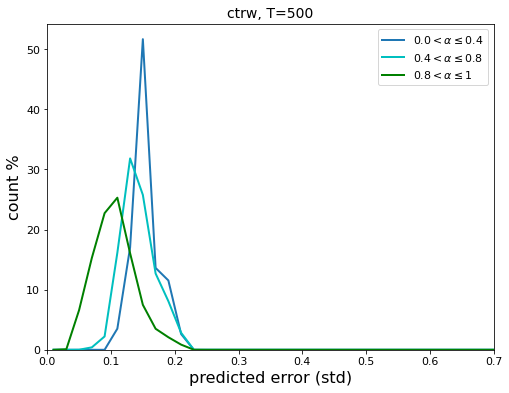

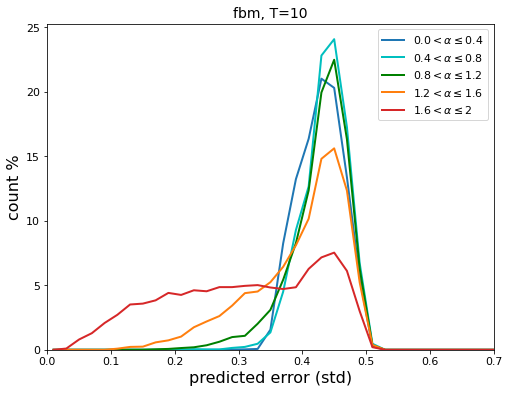

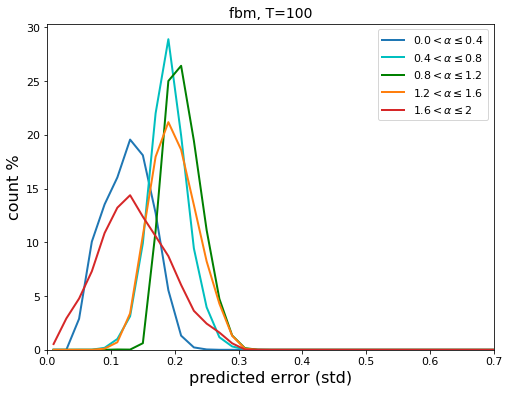

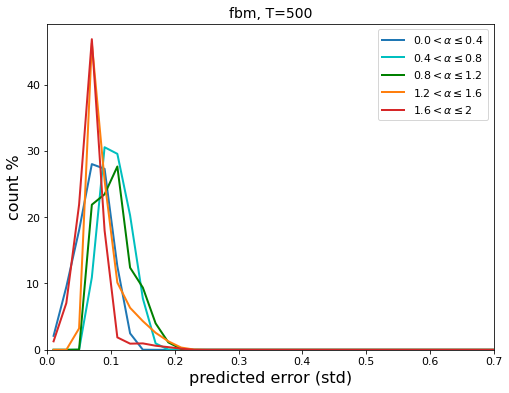

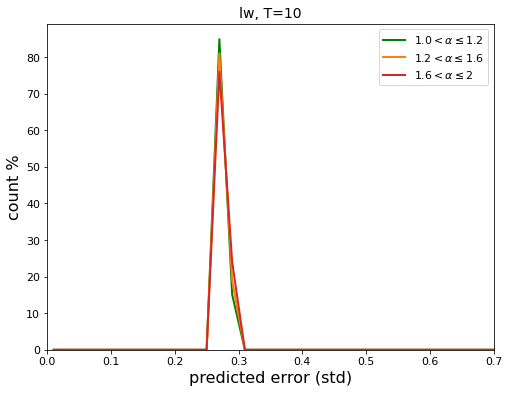

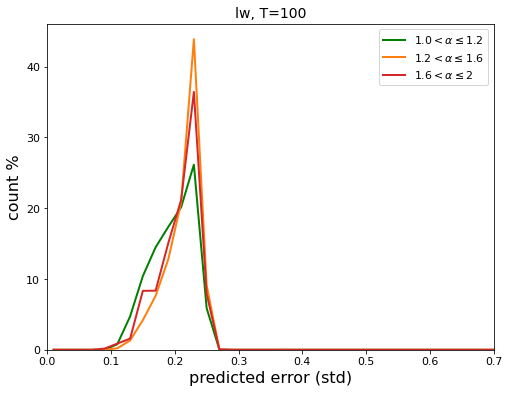

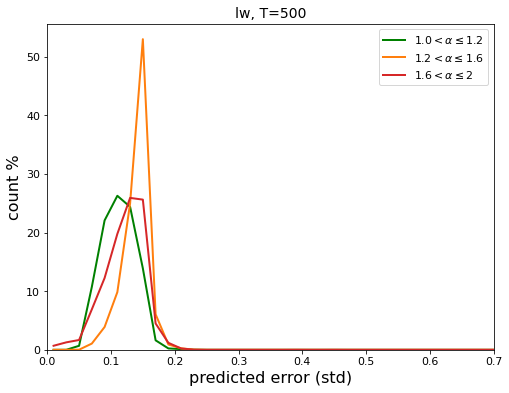

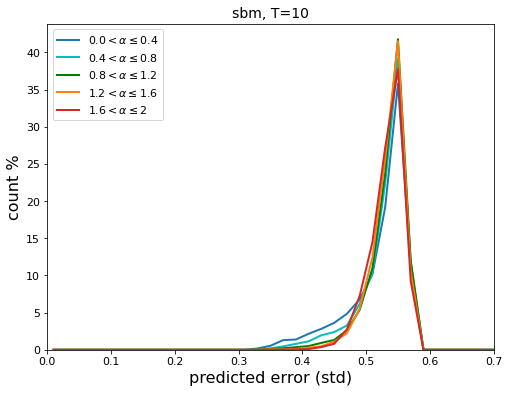

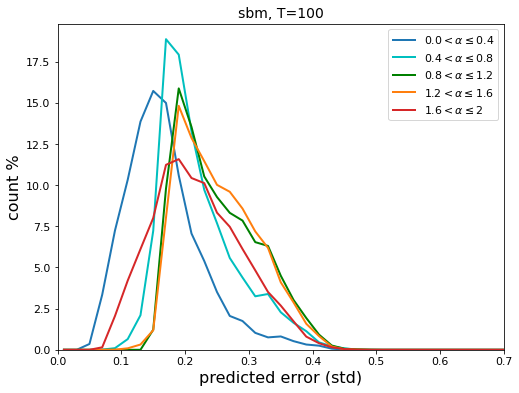

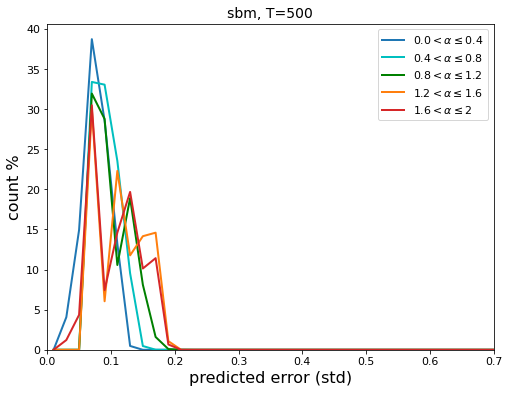

In [15]:
#histogramm exp split!
for modl in range(len(models)):
    for i in range(len(lengths)):
        newfigure = plt.figure(figsize=(8,6))
        plotaxes = newfigure.add_subplot(111)

        if modl == 0 or modl == 1: #subdiffusive model
            exponent_split = np.asarray([0,0.4,0.8])
        elif modl == 3: #superdiffusive model
            exponent_split = np.asarray([1.0,1.2,1.6])
        else:
            exponent_split = np.asarray([0,0.4,0.8,1.2,1.6])
        pred_values = plotdatas_models[modl][i][1]
        target_values = plotdatas_models[modl][i][0]
        pred_std = plotdatas_models[modl][i][2]
        all_models = plotdatas_models[modl][i][3]
        all_noises = plotdatas_models[modl][i][4]

        #label for the exponent split
        exp_labels = []
        for k in range(len(exponent_split)-1):
            labeltxt = f"{exponent_split[k]}"+r"$<\alpha\leq$"+f"{exponent_split[k+1]}"
            exp_labels.append(labeltxt)
        labeltxt = f"{exponent_split[-1]}"+r"$<\alpha\leq$2"
        if modl == 0 or modl == 1:
                labeltxt = f"{exponent_split[-1]}"+r"$<\alpha\leq$1"
        exp_labels.append(labeltxt)

        #observed error over predicted error
        predicted_errors = np.arange(0.,1,0.02)
        observed_errors = np.zeros((len(predicted_errors),len(exponent_split)))
        n_interval = np.zeros((len(predicted_errors),len(exponent_split)))
        n_interval_per_model = np.zeros((5,len(exponent_split),len(predicted_errors)))
        n_exp = np.zeros(len(exponent_split))

        for l in range(len(target_values)):
            """if len(filtered_models) != 0:
                model = self.models[int(data[3,l])]
                if not model in filtered_models:
                    continue
            if len(filtered_snr) != 0:
                noise = "snr "+str(int(1/data[4,l]+0.5))
                if not noise in filtered_snr:
                    continue"""


            index = np.where(predicted_errors <= pred_std[l].item())[-1][-1]
            index_exp = np.where(exponent_split < target_values[l].item())[-1][-1]
            #print(index,pred_std[l]**2)
            n_interval[index,index_exp] += 1
            observed_errors[index,index_exp] += np.square(target_values[l] - pred_values[l])
            n_interval_per_model[int(all_models[l]),index_exp,index] += 1
            n_exp[index_exp] += 1

        for l in range(len(predicted_errors)):
            for k in range(len(exponent_split)):
                if n_interval[l,k] > 10:
                    observed_errors[l,k] = np.sqrt(observed_errors[l,k]/n_interval[l,k])
                else:
                    observed_errors[l,k] = np.nan


        models = ["attm","ctrw","fbm","lw","sbm"]
        expsplit_colors = ['#1f77b4',"c","g","#ff7f0e","#d62728"]
        if modl == 0 or modl == 1:
            expsplit_colors = expsplit_colors[0:3]
        elif modl == 3:
            expsplit_colors = expsplit_colors[2:5]
            
        for k in range(len(exponent_split)):
            plotaxes.plot(predicted_errors+0.01,n_interval[:,k]/n_exp[k]*100,label=exp_labels[k],
                          lw=2, color=expsplit_colors[k])
        plotaxes.set_xlabel("predicted error (std)")
        plotaxes.set_ylabel("count %")
        plotaxes.legend()
        plotaxes.set_ylim(ymin = 0)
        plotaxes.set_xlim(xmin = 0, xmax=0.7)
        plotaxes.set_title(models[modl]+f", T={lengths[i]}")

        #plt.savefig(f"figs/paper/regression_singlemodel_"+models[modl]+f"_errorhisto_T{lengths[i]}_expsplit.eps")

        plt.show()

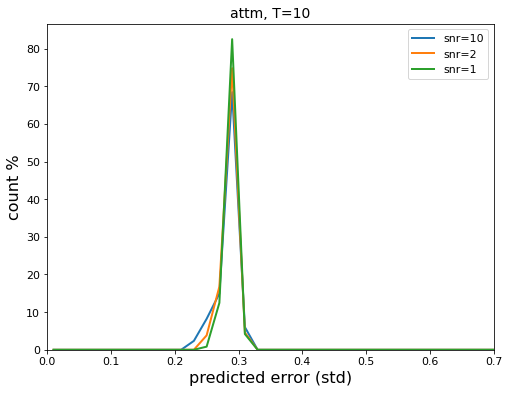

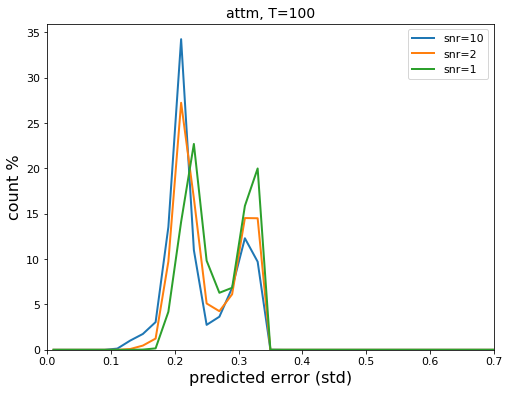

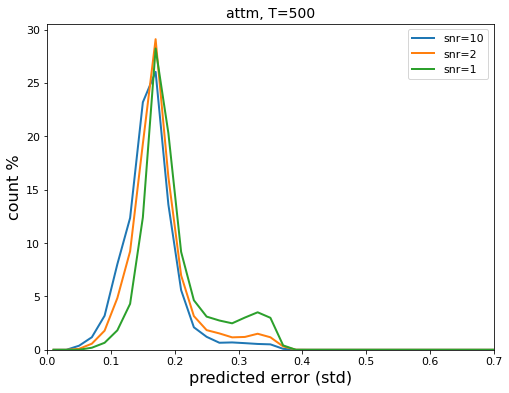

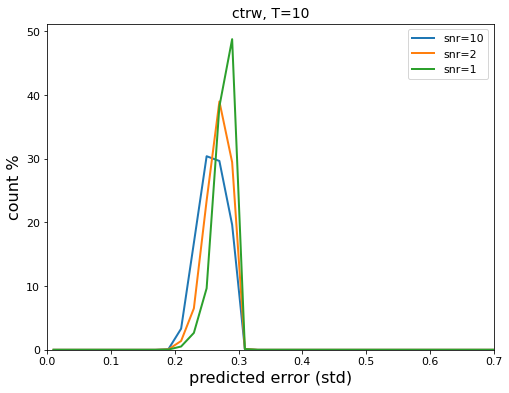

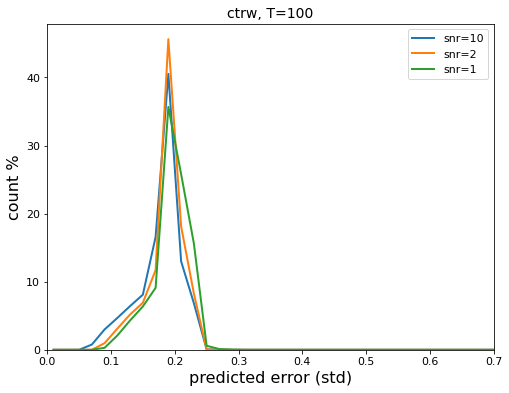

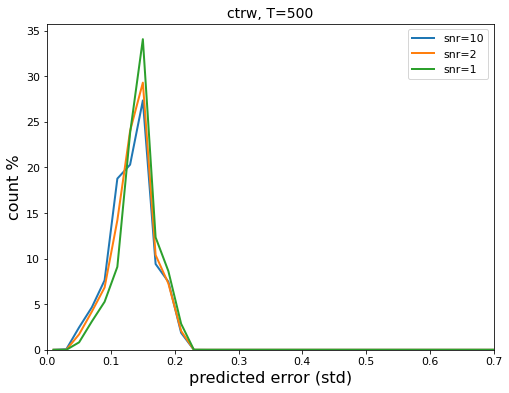

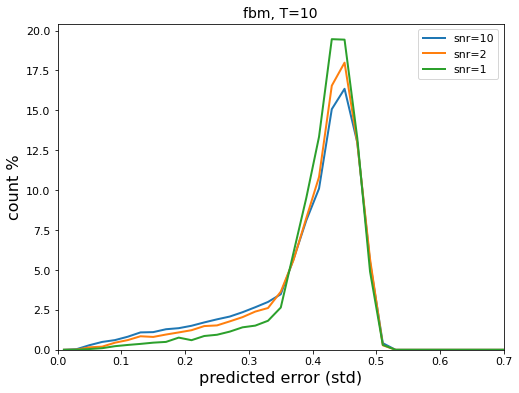

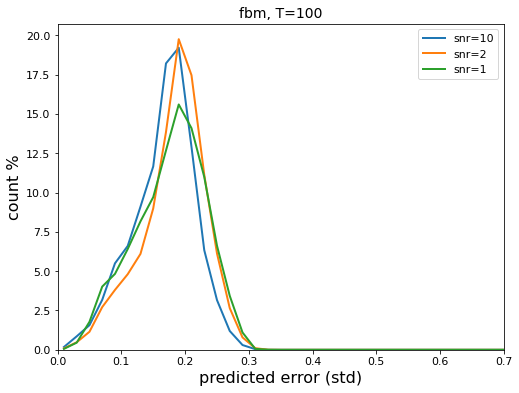

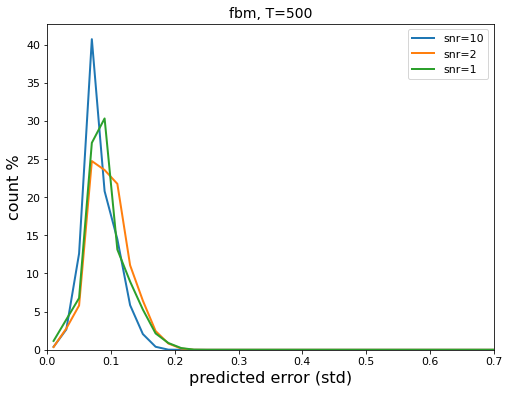

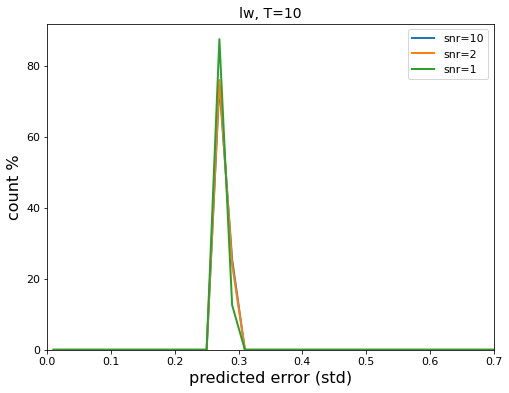

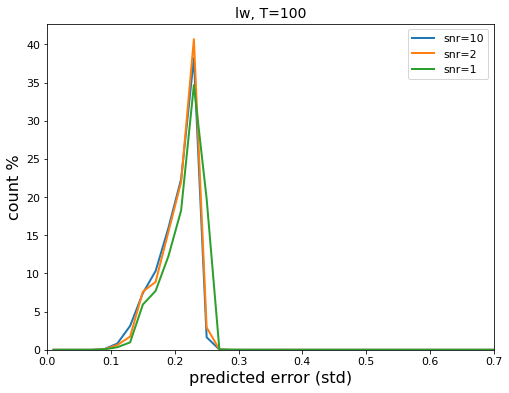

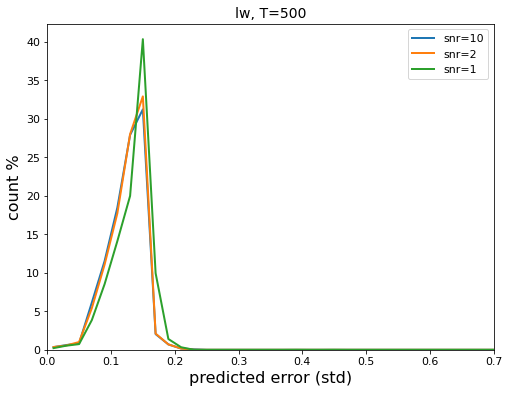

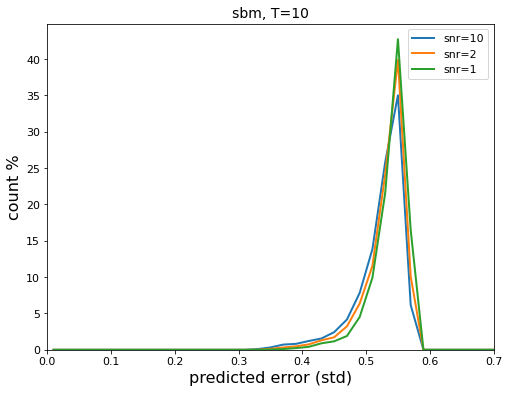

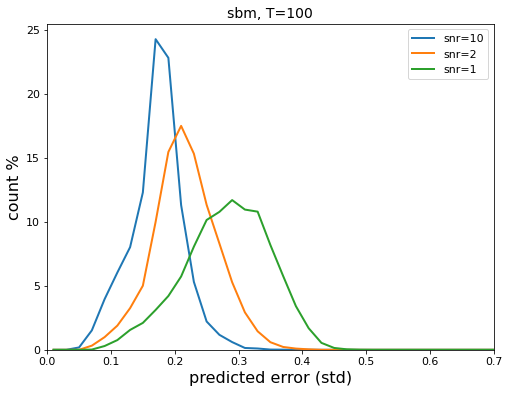

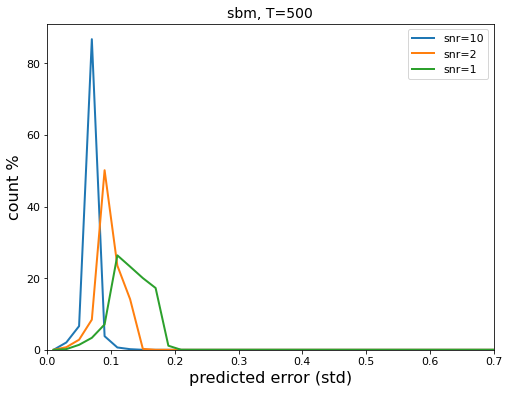

In [16]:
#errorhisto noisesplit
for modl in range(len(models)):
    for i in range(len(lengths)):
        newfigure = plt.figure(figsize=(8,6))
        plotaxes = newfigure.add_subplot(111)

        pred_values = plotdatas_models[modl][i][1]
        target_values = plotdatas_models[modl][i][0]
        pred_std = plotdatas_models[modl][i][2]
        all_models = plotdatas_models[modl][i][3]
        all_noises = plotdatas_models[modl][i][4]
        snrs = ["10","2","1"]


        #observed error over predicted error
        predicted_errors = np.arange(0.,1,0.02)
        observed_errors = np.zeros((len(predicted_errors),len(snrs)))
        n_interval = np.zeros((len(predicted_errors),len(snrs)))
        n_interval_per_model = np.zeros((5,len(snrs),len(predicted_errors)))
        n_snr = np.zeros(3)

        for l in range(len(target_values)):
            """if len(filtered_models) != 0:
                model = self.models[int(data[3,l])]
                if not model in filtered_models:
                    continue
            if len(filtered_snr) != 0:
                noise = "snr "+str(int(1/data[4,l]+0.5))
                if not noise in filtered_snr:
                    continue"""


            index = np.where(predicted_errors <= pred_std[l].item())[-1][-1]
            snr = int(1/all_noises[l]+0.5)
            index_snr = 2
            if snr == 2:
                index_snr = 1
            elif snr > 2:
                index_snr = 0
            #print(index,pred_std[l]**2)
            n_interval[index,index_snr] += 1
            observed_errors[index,index_snr] += np.square(target_values[l] - pred_values[l])
            n_interval_per_model[int(all_models[l]),index_snr,index] += 1
            n_snr[index_snr] += 1

        for l in range(len(predicted_errors)):
            for k in range(len(snrs)):
                if n_interval[l,k] > 10:
                    observed_errors[l,k] = np.sqrt(observed_errors[l,k]/n_interval[l,k])
                else:
                    observed_errors[l,k] = np.nan



        models = ["attm","ctrw","fbm","lw","sbm"]
        for k in range(len(snrs)):
            plotaxes.plot(predicted_errors+0.01,n_interval[:,k]/n_snr[k]*100,label=f"snr={snrs[k]}",lw=2)
        plotaxes.set_xlabel("predicted error (std)")
        plotaxes.set_ylabel("count %")
        plotaxes.legend()
        plotaxes.set_ylim(ymin = 0)
        plotaxes.set_xlim(xmin = 0, xmax=0.7)
        
        plotaxes.set_title(models[modl]+f", T={lengths[i]}")
        #plt.savefig(f"figs/paper/regression_singlemodel_"+models[modl]+f"_errorhisto_T{lengths[i]}_noisesplit.eps")

        plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


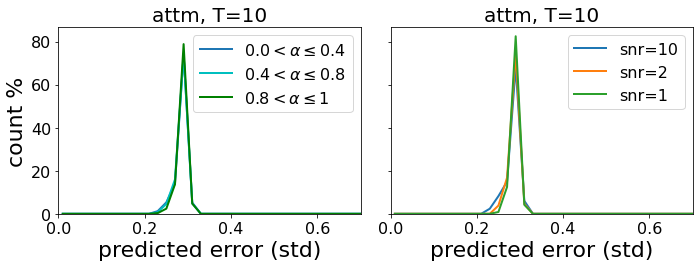

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


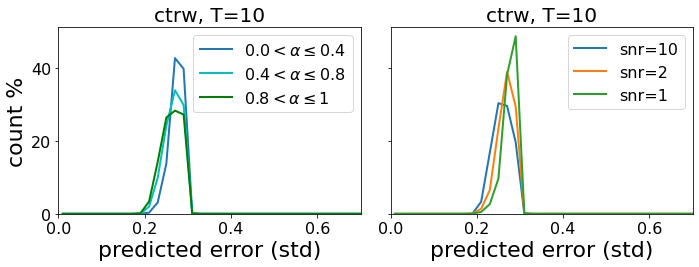

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


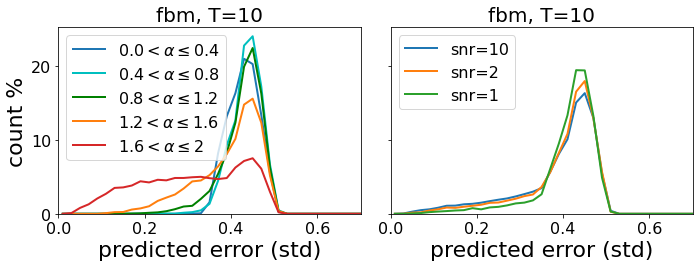

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


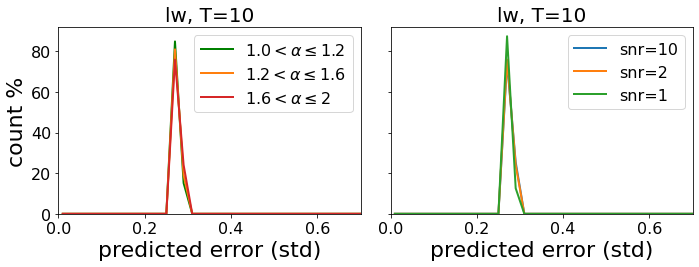

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


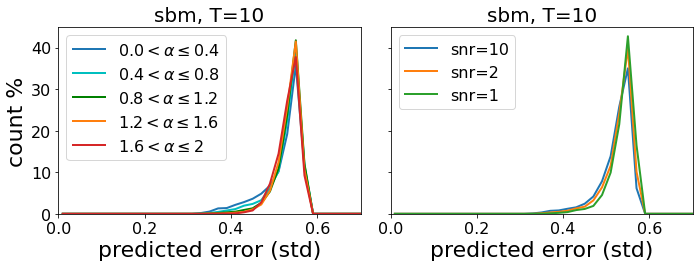

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


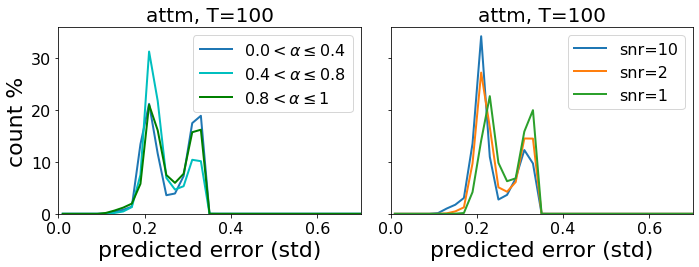

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


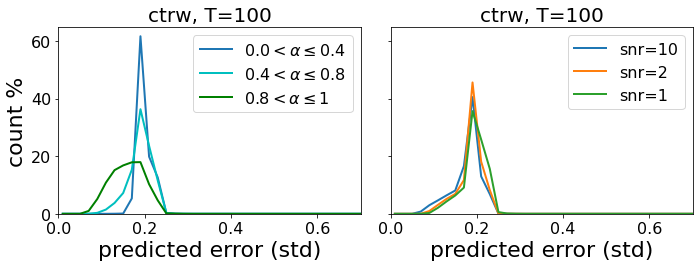

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


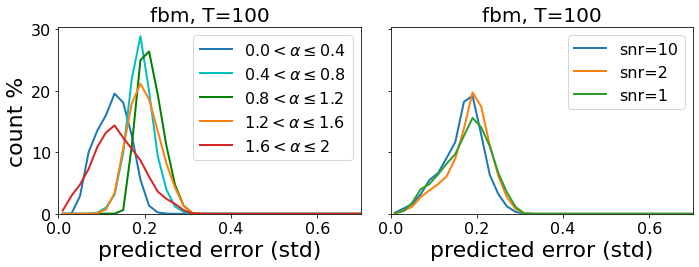

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


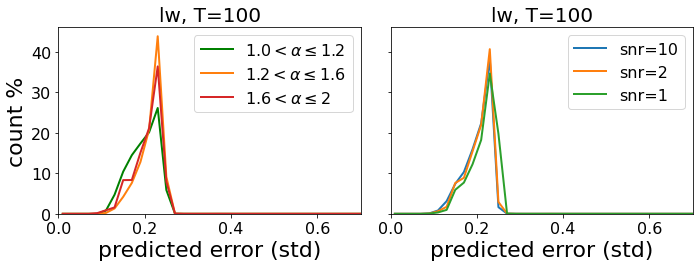

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


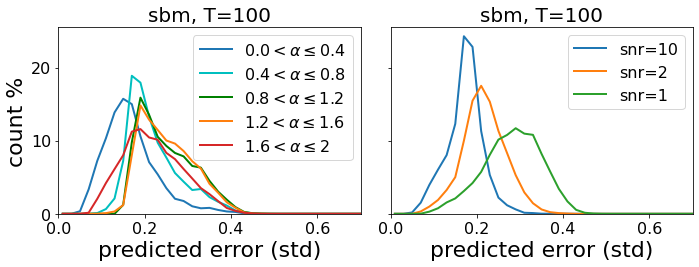

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


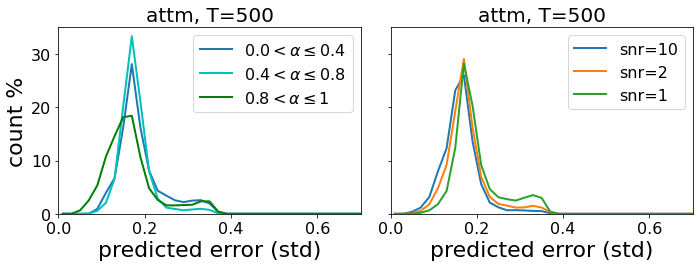

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


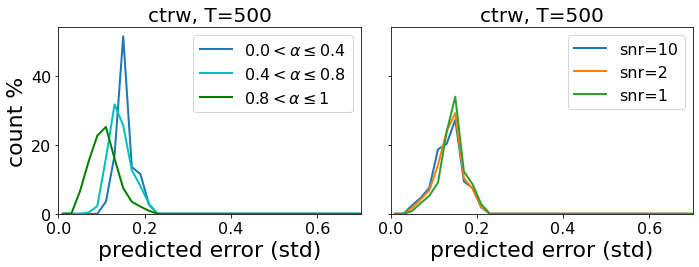

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


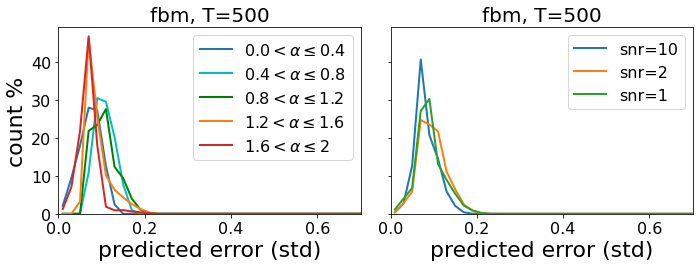

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


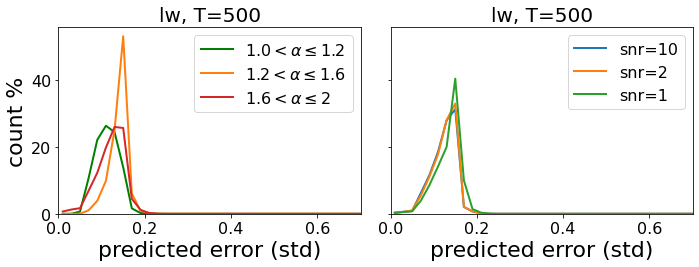

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


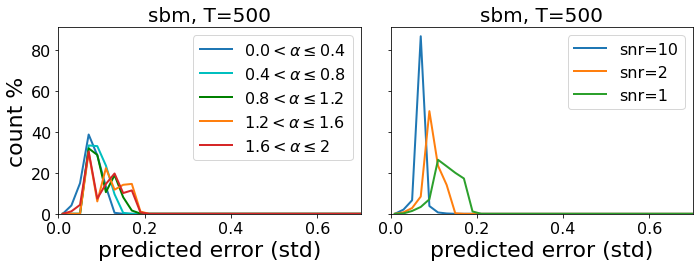

In [7]:
#noise+expsplit in one
for i in range(len(lengths)):
    for modl in range(len(models)):
        newfigure,axs = plt.subplots(1,2,figsize=(10,4))#plt.figure(figsize=(8,6))
        #plotaxes = newfigure.add_subplot(111)
        
        #expsplit
        plotaxes = axs[0]
        if modl == 0 or modl == 1: #subdiffusive model
            exponent_split = np.asarray([0,0.4,0.8])
        elif modl == 3: #superdiffusive model
            exponent_split = np.asarray([1.0,1.2,1.6])
        else:
            exponent_split = np.asarray([0,0.4,0.8,1.2,1.6])
        pred_values = plotdatas_models[modl][i][1]
        target_values = plotdatas_models[modl][i][0]
        pred_std = plotdatas_models[modl][i][2]
        all_models = plotdatas_models[modl][i][3]
        all_noises = plotdatas_models[modl][i][4]

        #label for the exponent split
        exp_labels = []
        for k in range(len(exponent_split)-1):
            labeltxt = f"{exponent_split[k]}"+r"$<\alpha\leq$"+f"{exponent_split[k+1]}"
            exp_labels.append(labeltxt)
        labeltxt = f"{exponent_split[-1]}"+r"$<\alpha\leq$2"
        if modl == 0 or modl == 1:
                labeltxt = f"{exponent_split[-1]}"+r"$<\alpha\leq$1"
        exp_labels.append(labeltxt)

        #observed error over predicted error
        predicted_errors = np.arange(0.,1,0.02)
        observed_errors = np.zeros((len(predicted_errors),len(exponent_split)))
        n_interval = np.zeros((len(predicted_errors),len(exponent_split)))
        n_interval_per_model = np.zeros((5,len(exponent_split),len(predicted_errors)))
        n_exp = np.zeros(len(exponent_split))

        for l in range(len(target_values)):
            """if len(filtered_models) != 0:
                model = self.models[int(data[3,l])]
                if not model in filtered_models:
                    continue
            if len(filtered_snr) != 0:
                noise = "snr "+str(int(1/data[4,l]+0.5))
                if not noise in filtered_snr:
                    continue"""


            index = np.where(predicted_errors <= pred_std[l].item())[-1][-1]
            index_exp = np.where(exponent_split < target_values[l].item())[-1][-1]
            #print(index,pred_std[l]**2)
            n_interval[index,index_exp] += 1
            observed_errors[index,index_exp] += np.square(target_values[l] - pred_values[l])
            n_interval_per_model[int(all_models[l]),index_exp,index] += 1
            n_exp[index_exp] += 1

        for l in range(len(predicted_errors)):
            for k in range(len(exponent_split)):
                if n_interval[l,k] > 10:
                    observed_errors[l,k] = np.sqrt(observed_errors[l,k]/n_interval[l,k])
                else:
                    observed_errors[l,k] = np.nan


        models = ["attm","ctrw","fbm","lw","sbm"]
        
        expsplit_colors = ['#1f77b4',"c","g","#ff7f0e","#d62728"]
        if modl == 0 or modl == 1:
            expsplit_colors = expsplit_colors[0:3]
        elif modl == 3:
            expsplit_colors = expsplit_colors[2:5]
            
        for k in range(len(exponent_split)):
            plotaxes.plot(predicted_errors+0.01,n_interval[:,k]/n_exp[k]*100,label=exp_labels[k],
                          lw=2, color=expsplit_colors[k])
        plotaxes.set_xlabel("predicted error (std)")
        plotaxes.set_ylabel("count %")
        plotaxes.legend()
        ymin1,ymax1 = plotaxes.set_ylim(ymin = 0)
        plotaxes.set_xlim(xmin = 0, xmax=0.7)
        plotaxes.set_title(models[modl]+f", T={lengths[i]}")
        
        #noisesplit
        plotaxes = axs[1]
        
        pred_values = plotdatas_models[modl][i][1]
        target_values = plotdatas_models[modl][i][0]
        pred_std = plotdatas_models[modl][i][2]
        all_models = plotdatas_models[modl][i][3]
        all_noises = plotdatas_models[modl][i][4]
        snrs = ["10","2","1"]


        #observed error over predicted error
        predicted_errors = np.arange(0.,1,0.02)
        observed_errors = np.zeros((len(predicted_errors),len(snrs)))
        n_interval = np.zeros((len(predicted_errors),len(snrs)))
        n_interval_per_model = np.zeros((5,len(snrs),len(predicted_errors)))
        n_snr = np.zeros(3)

        for l in range(len(target_values)):
            """if len(filtered_models) != 0:
                model = self.models[int(data[3,l])]
                if not model in filtered_models:
                    continue
            if len(filtered_snr) != 0:
                noise = "snr "+str(int(1/data[4,l]+0.5))
                if not noise in filtered_snr:
                    continue"""


            index = np.where(predicted_errors <= pred_std[l].item())[-1][-1]
            snr = int(1/all_noises[l]+0.5)
            index_snr = 2
            if snr == 2:
                index_snr = 1
            elif snr > 2:
                index_snr = 0
            #print(index,pred_std[l]**2)
            n_interval[index,index_snr] += 1
            observed_errors[index,index_snr] += np.square(target_values[l] - pred_values[l])
            n_interval_per_model[int(all_models[l]),index_snr,index] += 1
            n_snr[index_snr] += 1

        for l in range(len(predicted_errors)):
            for k in range(len(snrs)):
                if n_interval[l,k] > 10:
                    observed_errors[l,k] = np.sqrt(observed_errors[l,k]/n_interval[l,k])
                else:
                    observed_errors[l,k] = np.nan



        models = ["attm","ctrw","fbm","lw","sbm"]
        for k in range(len(snrs)):
            plotaxes.plot(predicted_errors+0.01,n_interval[:,k]/n_snr[k]*100,label=f"snr={snrs[k]}",lw=2)
        plotaxes.set_xlabel("predicted error (std)")
        plotaxes.set_ylabel("count %")
        plotaxes.legend()
        ymin2,ymax2 = plotaxes.set_ylim(ymin = 0)
        plotaxes.set_xlim(xmin = 0, xmax=0.7)
        
        if ymax2 > ymax1:
            axs[0].set_ylim(0,ymax2)
        else:
            axs[1].set_ylim(0,ymax1)
        
        plotaxes.set_title(models[modl]+f", T={lengths[i]}")
        plotaxes.label_outer()
        plt.tight_layout()
        
        plt.savefig(f"figs/paper/regression_singlemodel_"+models[modl]+f"_errorhisto_T{lengths[i]}_exnoisesplit.eps")
        plt.show()

### Classification as one of attm,ctrw,fbm,lw,sbm

In [18]:
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from matplotlib.axes import Axes
import seaborn as sn
import pandas as pd


plt.rcParams.update({'font.size': 11})
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=16)

In [19]:
lengths = [10,25,50,100,250,500,999]

models = ["attm","ctrw","fbm","lw","sbm"]

plotdatas = []
for T in lengths:
    plotdata = np.loadtxt("plotdata/"+f"classification_length{T}")
    plotdatas.append(plotdata)

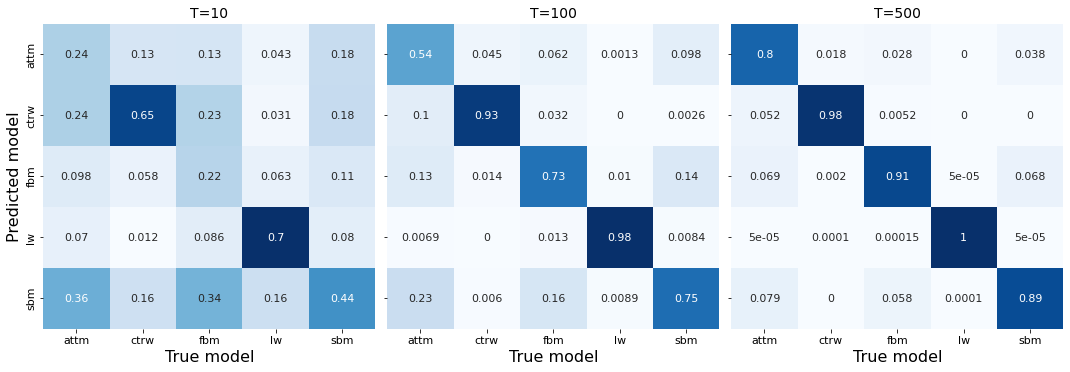

In [20]:
#conf matrix

fig, axs = plt.subplots(1,3, figsize=(15,5.3))

it = 0

for tt in [0,3,5]:#lengths 10,100,500
    plotaxes = axs[it]
    it+= 1
    
    all_gt_models = plotdatas[tt][0]
    all_confidences = plotdatas[tt][1:6]
    all_exponents = plotdatas[tt][6]
    all_noises = plotdatas[tt][7]
    #print(all_confidences[:,0])

    predicted_models = np.argmax(all_confidences, 0)
    #print(all_confidences[predicted_models[0],0],predicted_models[0])

    accuracy = (predicted_models == all_gt_models).sum()/len(predicted_models)
    #print(accuracy)

    #init conf matrix
    conf_matrix = np.zeros((5,5))
    #loop over all test samples
    for i in range(len(all_gt_models)):
        """if len(filtered_models) != 0:
            model = self.models[int(all_gt_models[i])]
            if not model in filtered_models:
                continue
        if len(filtered_snr) != 0:
            noise = "snr "+str(int(1/all_noises[i]+0.5))
            if not noise in filtered_snr:
                continue"""

        prediction = -1
        confidence = 0
        conf_norm = 0
        for j in range(5):
            """if len(filtered_models) != 0:
                model = self.models[j]
                if not model in filtered_models:
                    continue"""
            conf_norm += all_confidences[j,i]
            if all_confidences[j,i] > confidence:
                confidence = all_confidences[j,i]
                prediction = j
        confidence /= conf_norm


        conf_matrix[prediction,int(all_gt_models[i])] += 1

    conf_matrix = conf_matrix/conf_matrix.sum(axis=0)


    df_cm = pd.DataFrame(conf_matrix, index = [m for m in models],
                      columns = [m for m in models])
    # plt.figure(figsize=(7,7))
    #sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, ax=plotaxes, cbar = False, cmap = "Blues")
    plotaxes.set_xlabel("True model")
    plotaxes.set_ylabel("Predicted model")
    
    
    plotaxes.set_title(f"T={lengths[tt]}")
    
    plotaxes.label_outer()
plt.tight_layout()  

plt.savefig(f"figs/paper/classification_confusionmatrix.eps")

plt.show()

C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/1940388458.py:58: RuntimeWarning: invalid value encountered in true_divide
  accuracy_interval /= n_interval
C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/1940388458.py:58: RuntimeWarning: invalid value encountered in true_divide
  accuracy_interval /= n_interval
C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/1940388458.py:58: RuntimeWarning: invalid value encountered in true_divide
  accuracy_interval /= n_interval
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


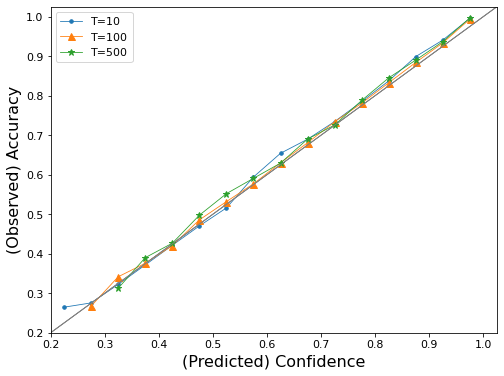

In [21]:
#conf accu v1
jj=0
newfigure = plt.figure(figsize=(8,6))
plotaxes = newfigure.add_subplot(111)
for tt in [0,3,5]:

    
    all_gt_models = plotdatas[tt][0]
    all_confidences = plotdatas[tt][1:6]
    all_exponents = plotdatas[tt][6]
    all_noises = plotdatas[tt][7]


    confidence_intervals = np.arange(0,1,0.05) #confidence intervals
    n_interval = np.zeros(len(confidence_intervals))
    accuracy_interval = np.zeros(len(confidence_intervals))
    total_accuracy  = 0
    mean_confidence = 0
    n_samples = 0

    for i in range(len(all_gt_models)):
        label = int(all_gt_models[i])
        """if len(filtered_models) != 0:
            model = self.models[int(all_gt_models[i])]
            if not model in filtered_models:
                continue
        if len(filtered_snr) != 0:
            noise = "snr "+str(int(1/all_noises[i]+0.5))
            if not noise in filtered_snr:
                continue"""

        prediction = -1
        confidence = 0
        conf_norm = 0
        for j in range(5):
            """if len(filtered_models) != 0:
                model = self.models[j]
                if not model in filtered_models:
                    continue"""
            conf_norm += all_confidences[j,i]
            if all_confidences[j,i] > confidence:
                confidence = all_confidences[j,i]
                prediction = j
        confidence /= conf_norm

        index = np.where(confidence_intervals <= confidence)[-1][-1]
        #print(index)
        #print(outputs_prob[i][pred])
        n_interval[index] += 1
        if (label == prediction):
            accuracy_interval[index] += 1
            total_accuracy += 1
        mean_confidence += confidence
        n_samples += 1

    total_accuracy /= n_samples
    mean_confidence /= n_samples
    accuracy_interval /= n_interval
    for i in np.where(n_interval<50):
        accuracy_interval[i] = np.nan
    
    
    symbols = [".-","^-","*-"]
    #plot accuracy over confidence
    plotaxes.plot(confidence_intervals+0.025,accuracy_interval,symbols[jj],ms=7,lw=0.8, label = f"T={lengths[tt]}")
    plotaxes.plot(np.arange(0,1.06,0.05),np.arange(0,1.06,0.05),"grey",lw=0.8)
    
    jj+=1
plotaxes.set_xlim(xmin=0.2,xmax=1.025)
plotaxes.set_ylim(ymin=0.2,ymax=1.025)
plotaxes.set_xlabel("(Predicted) Confidence")
plotaxes.set_ylabel("(Observed) Accuracy")
plotaxes.legend()

plt.savefig("figs/paper/classification_classi_conf_accu_v1.eps")

plt.show()

C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/3693212213.py:58: RuntimeWarning: invalid value encountered in true_divide
  accuracy_interval /= n_interval
C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/3693212213.py:58: RuntimeWarning: invalid value encountered in true_divide
  accuracy_interval /= n_interval
C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/3693212213.py:58: RuntimeWarning: invalid value encountered in true_divide
  accuracy_interval /= n_interval
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


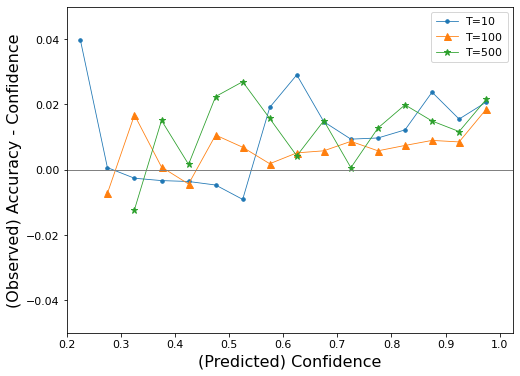

In [22]:
#conf accu v1
jj=0
newfigure = plt.figure(figsize=(8,6))
plotaxes = newfigure.add_subplot(111)
for tt in [0,3,5]:

    
    all_gt_models = plotdatas[tt][0]
    all_confidences = plotdatas[tt][1:6]
    all_exponents = plotdatas[tt][6]
    all_noises = plotdatas[tt][7]


    confidence_intervals = np.arange(0,1,0.05) #confidence intervals
    n_interval = np.zeros(len(confidence_intervals))
    accuracy_interval = np.zeros(len(confidence_intervals))
    total_accuracy  = 0
    mean_confidence = 0
    n_samples = 0

    for i in range(len(all_gt_models)):
        label = int(all_gt_models[i])
        """if len(filtered_models) != 0:
            model = self.models[int(all_gt_models[i])]
            if not model in filtered_models:
                continue
        if len(filtered_snr) != 0:
            noise = "snr "+str(int(1/all_noises[i]+0.5))
            if not noise in filtered_snr:
                continue"""

        prediction = -1
        confidence = 0
        conf_norm = 0
        for j in range(5):
            """if len(filtered_models) != 0:
                model = self.models[j]
                if not model in filtered_models:
                    continue"""
            conf_norm += all_confidences[j,i]
            if all_confidences[j,i] > confidence:
                confidence = all_confidences[j,i]
                prediction = j
        confidence /= conf_norm

        index = np.where(confidence_intervals <= confidence)[-1][-1]
        #print(index)
        #print(outputs_prob[i][pred])
        n_interval[index] += 1
        if (label == prediction):
            accuracy_interval[index] += 1
            total_accuracy += 1
        mean_confidence += confidence
        n_samples += 1

    total_accuracy /= n_samples
    mean_confidence /= n_samples
    accuracy_interval /= n_interval
    for i in np.where(n_interval<50):
        accuracy_interval[i] = np.nan
    
    
    symbols = [".-","^-","*-"]
    #plot accuracy over confidence
    plotaxes.plot(confidence_intervals+0.025,accuracy_interval-confidence_intervals-0.025,symbols[jj],ms=7,lw=0.8, label = f"T={lengths[tt]}")
    plotaxes.plot(np.arange(0,1.06,0.05),np.arange(0,1.06,0.05)-np.arange(0,1.06,0.05),"grey",lw=0.8)
    
    jj+=1
plotaxes.set_xlim(xmin=0.2,xmax=1.025)
plotaxes.set_ylim(ymin=-0.05,ymax=+0.05)
plotaxes.set_xlabel("(Predicted) Confidence")
plotaxes.set_ylabel("(Observed) Accuracy - Confidence")
plotaxes.legend()

plt.savefig("figs/paper/classification_classi_conf_accu_v2.eps")

plt.show()

C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/20201455.py:66: RuntimeWarning: invalid value encountered in true_divide
  accuracy_interval /= n_interval
C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/20201455.py:67: RuntimeWarning: invalid value encountered in true_divide
  mean_confidence_interval /= n_interval


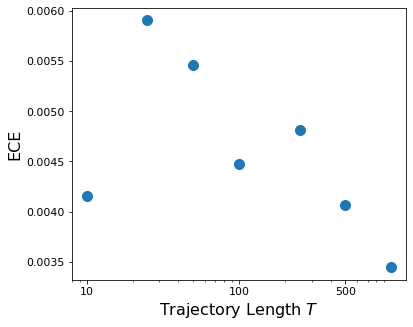

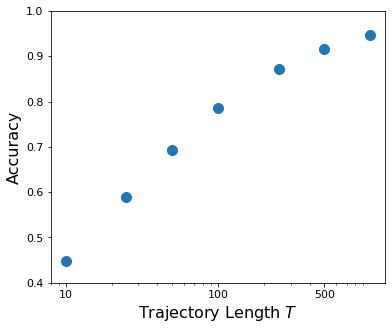

In [23]:
#expected calibration error (ECE) and achieved accuracy
jj=0
newfigure = plt.figure(figsize=(6,5))
plotaxes = newfigure.add_subplot(111)

ECEs = np.zeros(len(lengths))
total_accuracies = np.zeros(len(lengths))

for tt in range(len(lengths)):

    
    all_gt_models = plotdatas[tt][0]
    all_confidences = plotdatas[tt][1:6]
    all_exponents = plotdatas[tt][6]
    all_noises = plotdatas[tt][7]


    confidence_intervals = np.arange(0,1,0.05) #confidence intervals
    n_interval = np.zeros(len(confidence_intervals))
    accuracy_interval = np.zeros(len(confidence_intervals))
    #mean predicted confidence within the confidence interval, 
    #as this is a better estimate than just the middle of the interval
    mean_confidence_interval = np.zeros(len(confidence_intervals)) 
    total_accuracy  = 0
    mean_confidence = 0
    n_samples = 0

    for i in range(len(all_gt_models)):
        label = int(all_gt_models[i])
        """if len(filtered_models) != 0:
            model = self.models[int(all_gt_models[i])]
            if not model in filtered_models:
                continue
        if len(filtered_snr) != 0:
            noise = "snr "+str(int(1/all_noises[i]+0.5))
            if not noise in filtered_snr:
                continue"""

        prediction = -1
        confidence = 0
        conf_norm = 0
        for j in range(5):
            """if len(filtered_models) != 0:
                model = self.models[j]
                if not model in filtered_models:
                    continue"""
            conf_norm += all_confidences[j,i]
            if all_confidences[j,i] > confidence:
                confidence = all_confidences[j,i]
                prediction = j
        confidence /= conf_norm

        index = np.where(confidence_intervals <= confidence)[-1][-1]
        #print(index)
        #print(outputs_prob[i][pred])
        n_interval[index] += 1
        if (label == prediction):
            accuracy_interval[index] += 1
            total_accuracy += 1
        mean_confidence_interval[index] += confidence
        mean_confidence += confidence
        n_samples += 1

    total_accuracy /= n_samples
    mean_confidence /= n_samples
    accuracy_interval /= n_interval
    mean_confidence_interval /= n_interval
    for i in np.where(n_interval<50):
        accuracy_interval[i] = np.nan
    
    
    cali_errors = np.abs(accuracy_interval-mean_confidence_interval)
    
    ECE = 0
    NN = 0
    for k in range(len(cali_errors)):
        if not np.isnan(cali_errors[k]):
            ECE += n_interval[k]*(cali_errors[k])
            NN += n_interval[k]*1
    ECE = ECE/NN
    ECEs[tt] = ECE
    #print(ECE)
    total_accuracies[tt] = total_accuracy
    jj += 1
    
plotaxes.plot(lengths,ECEs,"o",ms=10)
#print(ECEs) 
    
    
plotaxes.set_xlabel(r"Trajectory Length $T$")#,fontsize=26)
plotaxes.set_ylabel(r"ECE")#,fontsize=26)
plotaxes.set_xscale('log')
#plotaxes.set_xticks([0,1,2])
#plotaxes.set_xticklabels(lengths)
#plotaxes.set_title(f"mean predicted squared error = {mean_conf:.4f}, observed mse = {mean_mse:.4f},\n observed mae={mae:.2f}")#,fontsize=24)
#plotaxes.set_xlim(xmin=0,xmax=0.7)
#plotaxes.set_ylim(ymin=-0.033,ymax=0.033)
#plt.legend()
plotaxes.set_xticks([10,100,500])
plotaxes.set_xticklabels([10,100,500])

plt.savefig("figs/paper/classification_ece.eps", bbox_inches="tight")
plt.show()

#accu plot
newfigure = plt.figure(figsize=(6,5))
plotaxes = newfigure.add_subplot(111)

plotaxes.plot(lengths,total_accuracies,"o",ms=10)
plotaxes.set_xlabel(r"Trajectory Length $T$")#,fontsize=26)
plotaxes.set_ylabel("Accuracy")#,fontsize=26)
plotaxes.set_xscale('log')
plotaxes.set_xticks([10,100,500])
plotaxes.set_xticklabels([10,100,500])
plotaxes.set_ylim(0.4,1)

plt.savefig("figs/paper/classification_accu.eps")
plt.show()

C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/3812432412.py:65: RuntimeWarning: invalid value encountered in true_divide
  accuracy_interval /= n_interval
C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/3812432412.py:65: RuntimeWarning: invalid value encountered in true_divide
  accuracy_interval /= n_interval
C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/3812432412.py:65: RuntimeWarning: invalid value encountered in true_divide
  accuracy_interval /= n_interval
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


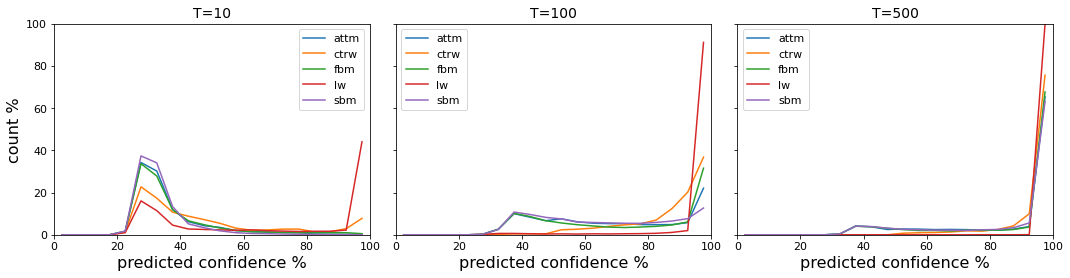

In [24]:
#errorhistogram per model

fig, axs = plt.subplots(1,3, figsize=(15,4))

it = 0

for tt in [0,3,5]:
    plotaxes = axs[it]
    it += 1
    
    all_gt_models = plotdatas[tt][0]
    all_confidences = plotdatas[tt][1:6]
    all_exponents = plotdatas[tt][6]
    all_noises = plotdatas[tt][7]

    confidence_intervals = np.arange(0,1.0,0.05) #confidence intervals
    n_interval = np.zeros(len(confidence_intervals))
    n_interval_per_model = np.zeros((5,len(confidence_intervals)))
    n_model = np.zeros(len(models))
    accuracy_interval = np.zeros(len(confidence_intervals))
    total_accuracy  = 0
    mean_confidence = 0
    n_samples = 0


    for i in range(len(all_gt_models)):
        label = int(all_gt_models[i])
        """if len(filtered_models) != 0:
            model = self.models[int(all_gt_models[i])]
            if not model in filtered_models:
                continue
        if len(filtered_snr) != 0:
            noise = "snr "+str(int(1/all_noises[i]+0.5))
            if not noise in filtered_snr:
                continue"""

        prediction = -1
        confidence = 0
        conf_norm = 0
        for j in range(5):
            """if len(filtered_models) != 0:
                model = self.models[j]
                if not model in filtered_models:
                    continue"""
            conf_norm += all_confidences[j,i]
            if all_confidences[j,i] > confidence:
                confidence = all_confidences[j,i]
                prediction = j
        confidence /= conf_norm

        index = np.where(confidence_intervals <= confidence)[-1][-1]
        #print(index)
        #print(outputs_prob[i][pred])
        n_interval[index] += 1
        n_interval_per_model[label,index] += 1
        if (label == prediction):
            accuracy_interval[index] += 1
            total_accuracy += 1
        mean_confidence += confidence
        n_samples += 1
        n_model[label] += 1

    total_accuracy /= n_samples
    mean_confidence /= n_samples
    accuracy_interval /= n_interval
    for i in np.where(n_interval<50):
        accuracy_interval[i] = np.nan


    models = ["attm","ctrw","fbm","lw","sbm"]
    for model in range(5):
        plotaxes.plot((confidence_intervals+0.025)*100,n_interval_per_model[model]/n_model[model]*100,label=models[model])
    plotaxes.legend()
    plotaxes.set_xlabel("predicted confidence %")
    plotaxes.set_ylabel("count %")
    
    plotaxes.set_xlim(0,100)
    plotaxes.set_ylim(0,100)
    
    plotaxes.set_title(f"T={lengths[tt]}")

    plotaxes.label_outer()
plt.tight_layout()  
plt.savefig(f"figs/paper/classification_errorhistogram_modelsplit.eps")

plt.show()

C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/3318118587.py:81: RuntimeWarning: invalid value encountered in true_divide
  accuracy_interval /= n_interval
C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/3318118587.py:81: RuntimeWarning: invalid value encountered in true_divide
  accuracy_interval /= n_interval
C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/3318118587.py:81: RuntimeWarning: invalid value encountered in true_divide
  accuracy_interval /= n_interval
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


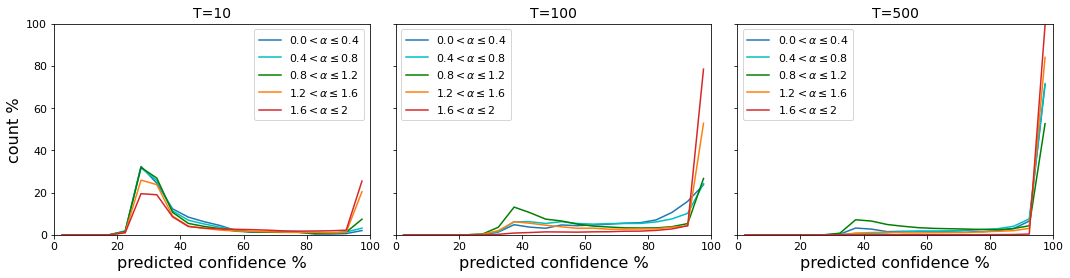

In [25]:
models = ["attm","ctrw","fbm","lw","sbm"]

fig, axs = plt.subplots(1,3, figsize=(15,4))

it = 0
#errorhistogram exponentsplit
for tt in [0,3,5]:
    
    plotaxes = axs[it]
    it += 1
    
    exponent_split = np.asarray([0,0.4,0.8,1.2,1.6])

    #label for the exponent split
    exp_labels = []
    for k in range(len(exponent_split)-1):
        labeltxt = f"{exponent_split[k]}"+r"$<\alpha\leq$"+f"{exponent_split[k+1]}"
        exp_labels.append(labeltxt)
    labeltxt = f"{exponent_split[-1]}"+r"$<\alpha\leq$2"
    exp_labels.append(labeltxt)
    
    all_gt_models = plotdatas[tt][0]
    all_confidences = plotdatas[tt][1:6]
    all_exponents = plotdatas[tt][6]
    all_noises = plotdatas[tt][7]

    confidence_intervals = np.arange(0,1.0,0.05) #confidence intervals
    n_interval = np.zeros(len(confidence_intervals))
    n_interval_per_model = np.zeros((5,len(confidence_intervals)))
    n_interval_per_exp = np.zeros((len(exponent_split),len(confidence_intervals)))
    n_exp = np.zeros(len(exponent_split))
    n_model = np.zeros(len(models))
    accuracy_interval = np.zeros(len(confidence_intervals))
    total_accuracy  = 0
    mean_confidence = 0
    n_samples = 0


    for i in range(len(all_gt_models)):
        label = int(all_gt_models[i])
        """if len(filtered_models) != 0:
            model = self.models[int(all_gt_models[i])]
            if not model in filtered_models:
                continue
        if len(filtered_snr) != 0:
            noise = "snr "+str(int(1/all_noises[i]+0.5))
            if not noise in filtered_snr:
                continue"""

        prediction = -1
        confidence = 0
        conf_norm = 0
        for j in range(5):
            """if len(filtered_models) != 0:
                model = self.models[j]
                if not model in filtered_models:
                    continue"""
            conf_norm += all_confidences[j,i]
            if all_confidences[j,i] > confidence:
                confidence = all_confidences[j,i]
                prediction = j
        confidence /= conf_norm

        index = np.where(confidence_intervals <= confidence)[-1][-1]
        index_exp = np.where(exponent_split < all_exponents[i].item())[-1][-1]
        #print(index)
        #print(outputs_prob[i][pred])
        n_interval[index] += 1
        n_interval_per_model[label,index] += 1
        if (label == prediction):
            accuracy_interval[index] += 1
            total_accuracy += 1
        mean_confidence += confidence
        n_samples += 1
        n_model[label] += 1
        n_interval_per_exp[index_exp,index] += 1
        n_exp[index_exp] += 1

    total_accuracy /= n_samples
    mean_confidence /= n_samples
    accuracy_interval /= n_interval
    for i in np.where(n_interval<50):
        accuracy_interval[i] = np.nan


    models = ["attm","ctrw","fbm","lw","sbm"]
    expsplit_colors = ['#1f77b4',"c","g","#ff7f0e","#d62728"]
    for e in range(len(exponent_split)):
        plotaxes.plot((confidence_intervals+0.025)*100,n_interval_per_exp[e]/n_exp[e]*100,
                      label=exp_labels[e], color=expsplit_colors[e])
    plotaxes.legend()
    plotaxes.set_xlabel("predicted confidence %")
    plotaxes.set_ylabel("count %")
    plotaxes.set_ylim(0,100)
    plotaxes.set_xlim(0,100)
    
    plotaxes.set_title(f"T={lengths[tt]}")
    plotaxes.label_outer()
    
plt.tight_layout()  
plt.savefig(f"figs/paper/classification_errorhistogram_expsplit.eps")

plt.show()

C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/986377747.py:78: RuntimeWarning: invalid value encountered in true_divide
  accuracy_interval /= n_interval
C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/986377747.py:78: RuntimeWarning: invalid value encountered in true_divide
  accuracy_interval /= n_interval
C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/986377747.py:78: RuntimeWarning: invalid value encountered in true_divide
  accuracy_interval /= n_interval
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


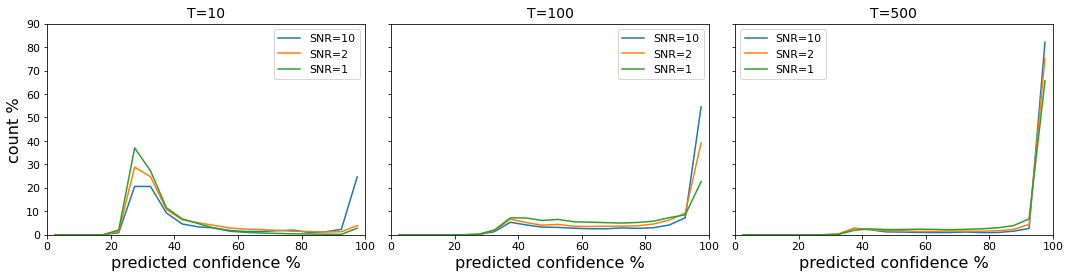

In [26]:

fig, axs = plt.subplots(1,3, figsize=(15,4))

it = 0

#errorhistogram noisesplit
for tt in [0,3,5]:
    
    plotaxes = axs[it]
    it += 1
    
    snrs = ["10","2","1"]
    
    all_gt_models = plotdatas[tt][0]
    all_confidences = plotdatas[tt][1:6]
    all_exponents = plotdatas[tt][6]
    all_noises = plotdatas[tt][7]

    confidence_intervals = np.arange(0,1.0,0.05) #confidence intervals
    n_interval = np.zeros(len(confidence_intervals))
    n_interval_per_model = np.zeros((5,len(confidence_intervals)))
    n_interval_per_snr = np.zeros((3,len(confidence_intervals)))
    n_snr = np.zeros(3)
    n_model = np.zeros(len(models))
    accuracy_interval = np.zeros(len(confidence_intervals))
    total_accuracy  = 0
    mean_confidence = 0
    n_samples = 0


    for i in range(len(all_gt_models)):
        label = int(all_gt_models[i])
        """if len(filtered_models) != 0:
            model = self.models[int(all_gt_models[i])]
            if not model in filtered_models:
                continue
        if len(filtered_snr) != 0:
            noise = "snr "+str(int(1/all_noises[i]+0.5))
            if not noise in filtered_snr:
                continue"""

        prediction = -1
        confidence = 0
        conf_norm = 0
        for j in range(5):
            """if len(filtered_models) != 0:
                model = self.models[j]
                if not model in filtered_models:
                    continue"""
            conf_norm += all_confidences[j,i]
            if all_confidences[j,i] > confidence:
                confidence = all_confidences[j,i]
                prediction = j
        confidence /= conf_norm

        index = np.where(confidence_intervals <= confidence)[-1][-1]
        
        snr = int(1/all_noises[i]+0.5)
        index_snr = 2
        if snr == 2:
            index_snr = 1
        elif snr > 2:
            index_snr = 0
        #print(index)
        #print(outputs_prob[i][pred])
        n_interval[index] += 1
        n_interval_per_model[label,index] += 1
        if (label == prediction):
            accuracy_interval[index] += 1
            total_accuracy += 1
        mean_confidence += confidence
        n_samples += 1
        n_model[label] += 1
        n_interval_per_snr[index_snr,index] += 1
        n_snr[index_snr] += 1

    total_accuracy /= n_samples
    mean_confidence /= n_samples
    accuracy_interval /= n_interval
    for i in np.where(n_interval<50):
        accuracy_interval[i] = np.nan


    models = ["attm","ctrw","fbm","lw","sbm"]
    for e in range(3):
        plotaxes.plot((confidence_intervals+0.025)*100,n_interval_per_snr[e]/n_snr[e]*100,label="SNR="+snrs[e])
    plotaxes.legend()
    plotaxes.set_xlabel("predicted confidence %")
    plotaxes.set_ylabel("count %")
    plotaxes.set_xlim(0,100)
    plotaxes.set_ylim(0,90)
    plotaxes.set_title(f"T={lengths[tt]}")
    
    plotaxes.label_outer()
    
plt.tight_layout()
    
plt.savefig(f"figs/paper/classification_errorhistogram_noisesplit.eps")

plt.show()

C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/2478511731.py:30: RuntimeWarning: invalid value encountered in true_divide
  mean_confidence_permodel_perexp /= n_permodel_perexp
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


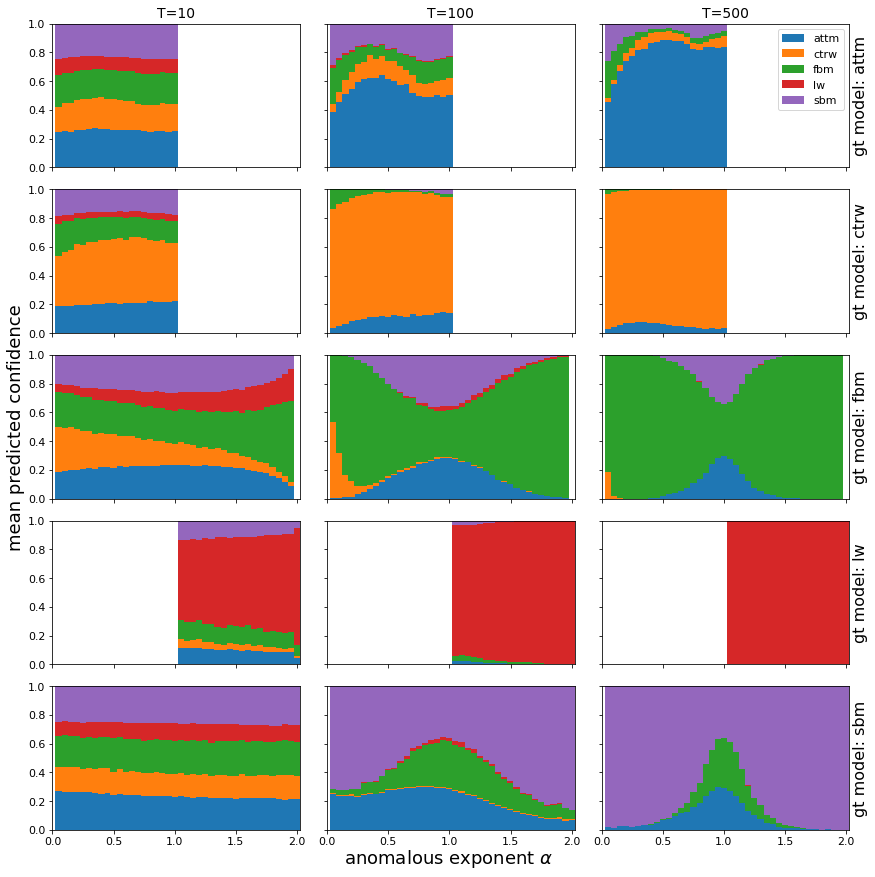

In [27]:
#prediction bar plots for each model per exponent! (could also be done for each model per noise)

fig, axs = plt.subplots(5,3, figsize=(12,12))

for mdl in range(5):

    it = 0
    for tt in [0,3,5]:
        plotaxes = axs[mdl,it]
        it += 1

        all_gt_models = plotdatas[tt][0]
        all_confidences = plotdatas[tt][1:6]
        all_exponents = plotdatas[tt][6]
        all_noises = plotdatas[tt][7]
        
        
        exponents = np.arange(0.05,2.01,0.05)
        mean_confidence_permodel_perexp = np.zeros((5,len(exponents)))
        n_permodel_perexp = np.zeros((5,len(exponents)))
        
        for i in range(len(all_gt_models)):
            if all_gt_models[i] == mdl:
                expint = np.where(all_exponents[i]<exponents+0.025)[0][0]
                for modelint in range(5):
                    mean_confidence_permodel_perexp[modelint,expint] += all_confidences[modelint][i]
                    n_permodel_perexp[modelint,expint] += 1
        
        #print(mean_confidence_permodel_perexp)
        mean_confidence_permodel_perexp /= n_permodel_perexp
        for i in range(len(mean_confidence_permodel_perexp)):
            for j in range(len(mean_confidence_permodel_perexp[0])):
                if np.isnan(mean_confidence_permodel_perexp[i,j]):
                    mean_confidence_permodel_perexp[i,j] = 0
        #print(mean_confidence_permodel_perexp)
        
        
        models = ["attm","ctrw","fbm","lw","sbm"]
        y_offset = np.zeros(len(exponents))
        for model in range(5):
            plotaxes.bar(exponents,mean_confidence_permodel_perexp[model],label=models[model],bottom=y_offset,width=0.052)
            y_offset = y_offset + np.asarray(mean_confidence_permodel_perexp[model])
        if mdl==0 and it == 3:
            plotaxes.legend()

        plotaxes.set_xlim(0,2.025)
        plotaxes.set_ylim(0,1)
        plotaxes.set_ylabel("gt model: "+ models[mdl])
        plotaxes.yaxis.set_label_position("right")
        #plotaxes.yaxis.tick_right()
        
        if mdl == 0:
            plotaxes.set_title(f"T={lengths[tt]}")

        plotaxes.label_outer()
        

    #plt.savefig(f"figs/paper/classification_errorhistogram_modelsplit.eps")

fig.text(0.5, 0,r"anomalous exponent $\alpha$", ha='center', va='center',size=18)
fig.text(0, 0.5, "mean predicted confidence", ha='center', va='center', rotation='vertical',size=18)
    
plt.tight_layout()    

plt.savefig("figs/paper/classification_meanconf_barplot.eps", bbox_inches="tight")

plt.show()

C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/325965132.py:67: RuntimeWarning: invalid value encountered in true_divide
  accuracy_interval /= n_interval
C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/325965132.py:67: RuntimeWarning: invalid value encountered in true_divide
  accuracy_interval /= n_interval
C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/325965132.py:67: RuntimeWarning: invalid value encountered in true_divide
  accuracy_interval /= n_interval


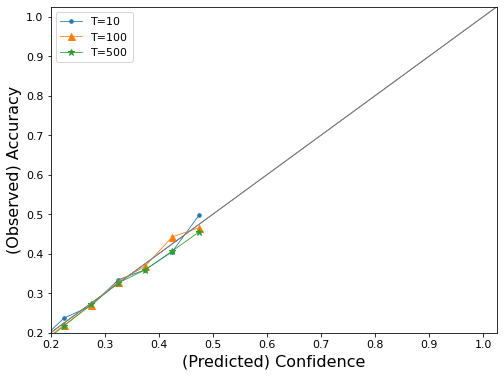

In [28]:
#second ranked confidence accuracy - are the second ranked confidences reliable?
jj=0
newfigure = plt.figure(figsize=(8,6))
plotaxes = newfigure.add_subplot(111)
for tt in [0,3,5]:

    
    all_gt_models = plotdatas[tt][0]
    all_confidences = plotdatas[tt][1:6]
    all_exponents = plotdatas[tt][6]
    all_noises = plotdatas[tt][7]


    confidence_intervals = np.arange(0,1,0.05) #confidence intervals
    n_interval = np.zeros(len(confidence_intervals))
    accuracy_interval = np.zeros(len(confidence_intervals))
    total_accuracy  = 0
    mean_confidence = 0
    n_samples = 0

    for i in range(len(all_gt_models)):
        label = int(all_gt_models[i])
        """if len(filtered_models) != 0:
            model = self.models[int(all_gt_models[i])]
            if not model in filtered_models:
                continue
        if len(filtered_snr) != 0:
            noise = "snr "+str(int(1/all_noises[i]+0.5))
            if not noise in filtered_snr:
                continue"""

        prediction = -1
        confidence = 0
        conf_norm = 0
        for j in range(5):
            """if len(filtered_models) != 0:
                model = self.models[j]
                if not model in filtered_models:
                    continue"""
            conf_norm += all_confidences[j,i]
            if all_confidences[j,i] > confidence:
                confidence = all_confidences[j,i]
                prediction = j
        second_prediction = -1
        confidence = 0
        for j in range(5):
            if j != prediction:
                #conf_norm += all_confidences[j,i]
                if all_confidences[j,i] > confidence:
                    confidence = all_confidences[j,i]
                    second_prediction = j
        confidence /= conf_norm
        prediction = second_prediction
        
        index = np.where(confidence_intervals <= confidence)[-1][-1]
        #print(index)
        #print(outputs_prob[i][pred])
        n_interval[index] += 1
        if (label == prediction):
            accuracy_interval[index] += 1
            total_accuracy += 1
        mean_confidence += confidence
        n_samples += 1

    total_accuracy /= n_samples
    mean_confidence /= n_samples
    accuracy_interval /= n_interval
    for i in np.where(n_interval<50):
        accuracy_interval[i] = np.nan
    
    
    symbols = [".-","^-","*-"]
    #plot accuracy over confidence
    plotaxes.plot(confidence_intervals+0.025,accuracy_interval,symbols[jj],ms=7,lw=0.8, label = f"T={lengths[tt]}")
    plotaxes.plot(np.arange(0,1.06,0.05),np.arange(0,1.06,0.05),"grey",lw=0.8)
    
    jj+=1
plotaxes.set_xlim(xmin=0.2,xmax=1.025)
plotaxes.set_ylim(ymin=0.2,ymax=1.025)
plotaxes.set_xlabel("(Predicted) Confidence")
plotaxes.set_ylabel("(Observed) Accuracy")
plotaxes.legend()

#plt.savefig("figs/paper/classification_classi_conf_accu_v1.eps")

plt.show()

C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/379979743.py:72: RuntimeWarning: invalid value encountered in true_divide
  accuracy_interval /= n_interval
C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/379979743.py:73: RuntimeWarning: invalid value encountered in true_divide
  mean_confidence_interval /= n_interval
C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/379979743.py:72: RuntimeWarning: invalid value encountered in true_divide
  accuracy_interval /= n_interval
C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/379979743.py:73: RuntimeWarning: invalid value encountered in true_divide
  mean_confidence_interval /= n_interval
C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/379979743.py:72: RuntimeWarning: invalid value encountered in true_divide
  accuracy_interval /= n_interval
C:\Users\hseck\AppData\Local\Temp/ipykernel_6012/379979743.py:73: RuntimeWarning: invalid value encountered in true_divide
  mean_confidence_interval /= n_interval
The PostScript backend does not suppo

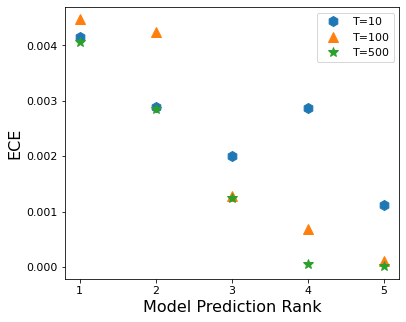

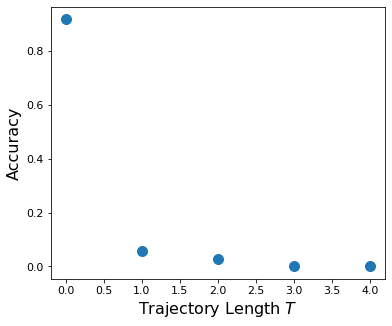

In [31]:
#expected calibration error (ECE) for second, third,... predictions?
jj=0
newfigure = plt.figure(figsize=(6,5))
plotaxes = newfigure.add_subplot(111)
for tt in [0,3,5]:
    ECEs = np.zeros(5)
    total_accuracies = np.zeros(5)

    for predrank in range(5):


        all_gt_models = plotdatas[tt][0]
        all_confidences = plotdatas[tt][1:6]
        all_exponents = plotdatas[tt][6]
        all_noises = plotdatas[tt][7]


        confidence_intervals = np.arange(0,1,0.05) #confidence intervals
        n_interval = np.zeros(len(confidence_intervals))
        accuracy_interval = np.zeros(len(confidence_intervals))
        #mean predicted confidence within the confidence interval, 
        #as this is a better estimate than just the middle of the interval
        mean_confidence_interval = np.zeros(len(confidence_intervals)) 
        total_accuracy  = 0
        mean_confidence = 0
        n_samples = 0

        for i in range(len(all_gt_models)):
            label = int(all_gt_models[i])
            """if len(filtered_models) != 0:
                model = self.models[int(all_gt_models[i])]
                if not model in filtered_models:
                    continue
            if len(filtered_snr) != 0:
                noise = "snr "+str(int(1/all_noises[i]+0.5))
                if not noise in filtered_snr:
                    continue"""

            prediction = -1
            confidence = 0
            conf_norm = 0
            for j in range(5):
                """if len(filtered_models) != 0:
                    model = self.models[j]
                    if not model in filtered_models:
                        continue"""
                conf_norm += all_confidences[j,i]
                if all_confidences[j,i] > confidence:
                    confidence = all_confidences[j,i]
                    prediction = j
            ranked_predictions = np.argsort(all_confidences[:,i])
            prediction = ranked_predictions[-1-predrank]
            confidence = all_confidences[prediction,i]

            confidence /= conf_norm



            index = np.where(confidence_intervals <= confidence)[-1][-1]
            #print(index)
            #print(outputs_prob[i][pred])
            n_interval[index] += 1
            if (label == prediction):
                accuracy_interval[index] += 1
                total_accuracy += 1
            mean_confidence_interval[index] += confidence
            mean_confidence += confidence
            n_samples += 1

        total_accuracy /= n_samples
        mean_confidence /= n_samples
        accuracy_interval /= n_interval
        mean_confidence_interval /= n_interval
        for i in np.where(n_interval<50):
            accuracy_interval[i] = np.nan


        cali_errors = np.abs(accuracy_interval-mean_confidence_interval)

        ECE = 0
        NN = 0
        for k in range(len(cali_errors)):
            if not np.isnan(cali_errors[k]):
                ECE += n_interval[k]*(cali_errors[k])
                NN += n_interval[k]*1
        ECE = ECE/NN
        ECEs[predrank] = ECE
        #print(ECE)
        total_accuracies[predrank] = total_accuracy
    jj += 1
    
    symbols = ["h","^","*"]
    plotaxes.plot(range(5),ECEs,symbols[jj-1],ms=10,label="T="+str(lengths[tt]))
    #print(ECEs) 


plotaxes.set_xlabel(r"Model Prediction Rank")#,fontsize=26)
plotaxes.set_ylabel(r"ECE")#,fontsize=26)

plotaxes.set_xticks([0,1,2,3,4])
plotaxes.set_xticklabels([1,2,3,4,5])
plotaxes.legend()

plt.savefig("figs/paper/classification_ece_lowerrankedpredictions.eps", bbox_inches="tight")
plt.show()

#accu plot
newfigure = plt.figure(figsize=(6,5))
plotaxes = newfigure.add_subplot(111)

plotaxes.plot(range(5),total_accuracies,"o",ms=10)
plotaxes.set_xlabel(r"Trajectory Length $T$")#,fontsize=26)
plotaxes.set_ylabel("Accuracy")#,fontsize=26)
#plotaxes.set_xscale('log')
#plotaxes.set_xticks([10,100,500])
#plotaxes.set_xticklabels([10,100,500])
#plotaxes.set_ylim(0.4,1)

#plt.savefig("figs/paper/classification_accu.eps")
plt.show()